In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import os
import textwrap
import statsmodels.formula.api as smf
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree

In [2]:
directory = "D:/Documentos/Code/UDESC/Trabalho-de-Conclusao-de-Curso-TCC000x/Dados/Databases/SAP"

data_dimensoes = "dimensoes_alunos.csv"
data_fatores = "fatores_alunos.csv"

dimensoes = os.path.join(directory, data_dimensoes)
fatores = os.path.join(directory, data_fatores)

tb_dimensoes = pd.read_csv(dimensoes)
tb_fatores = pd.read_csv(fatores)

tb_fatores_copy = tb_fatores.drop(columns=['id_raca_etnia', 'id_renda_familiar', 'sexo', 'id_turma', 'id_escola', 'etnia', 'renda', 'nome_turma', 'modo_ensino', 'etapa_ensino',
                                      'ano_turma', 'id_escola.1', 'nome_escola', 'endereco', 'restricao_de_atendimento', 'localidade_diferenciada', 'categoria_administrativa',
                                      'telefone', 'dependencia_administrativa', 'categoria_escola', 'conveniada_poder_publico', 'regulamentacao_pelo_conselho', 'porte_da_escola',
                                      'modalidade_ensino', 'outras_ofertas_educacionais', 'latitude', 'longitude', 'uf', 'municipio', 'localizacao', 'data_criacao',
                                      'nome_aluno', 'id', 'id_aluno.1', 'created_date', 'updated_date'])

td_dimensoes_fatores = pd.merge(tb_dimensoes, tb_fatores_copy, on='id_aluno', suffixes=('', ''))

if (td_dimensoes_fatores['id_aluno'] == td_dimensoes_fatores['id_aluno.1']).all():
    td_dimensoes_fatores = td_dimensoes_fatores.drop(columns=['id_aluno.1'])

td_dimensoes_fatores['ano_turma'] = td_dimensoes_fatores['ano_turma'].str.replace('º', '°')

br_states = gpd.read_file('../../Databases/Geografia/brazil_geo.json')

C:\Users\daniv\AppData\Local\Temp\ipykernel_17724\2417075229.py:9: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  tb_dimensoes = pd.read_csv(dimensoes)
C:\Users\daniv\AppData\Local\Temp\ipykernel_17724\2417075229.py:10: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  tb_fatores = pd.read_csv(fatores)


In [21]:
colunas = ['id_escola', 'localidade_diferenciada', 'localizacao', 'dependencia_administrativa', 'uf', 'porte_da_escola', 'outras_ofertas_educacionais']
df_escolas = td_dimensoes_fatores[colunas]
df_escolas = df_escolas.drop_duplicates()
df_escolas = df_escolas.reset_index(drop=True)
df_escolas

id_escola                            localidade_diferenciada localizacao  \
0     15070387  A escola não está em área de localização difer...      Urbana   
1     15547574  A escola não está em área de localização difer...      Urbana   
2     15562158  A escola não está em área de localização difer...      Urbana   
3     24038628                                     Terra indígena       Rural   
4     15151239  A escola não está em área de localização difer...       Rural   
..         ...                                                ...         ...   
303   22081925  A escola não está em área de localização difer...      Urbana   
304   15536971  A escola não está em área de localização difer...       Rural   
305   29432588  A escola não está em área de localização difer...       Rural   
306   15100812  A escola não está em área de localização difer...       Rural   
307   15048926  A escola não está em área de localização difer...       Rural   

    dependencia_administrativa  uf  \
0                    Municipal  PA   
1                    Municipal  PA   
2                    Municipal  PA   
3                    Municipal  RN   
4                    Municipal  PA   
..                         ...  ..   
303                  Municipal  PI   
304                  Municipal  PA   
305                  Municipal  BA   
306                  Municipal  PA   
307                  Municipal  PA   

                                  porte_da_escola  \
0     Entre 201 e 500 matrículas de escolarização   
1    Entre 501 e 1000 matrículas de escolarização   
2     Entre 201 e 500 matrículas de escolarização   
3     Entre 201 e 500 matrículas de escolarização   
4     Entre 201 e 500 matrículas de escolarização   
..                                            ...   
303    Entre 51 e 200 matrículas de escolarização   
304   Entre 201 e 500 matrículas de escolarização   
305  Entre 501 e 1000 matrículas de escolarização   
306    Entre 51 e 200 matrículas de escolarização   
307   Entre 201 e 500 matrículas de escolarização   

               outras_ofertas_educacionais  
0    Atendimento Educacional Especializado  
1    Atendimento Educacional Especializado  
2    Atendimento Educacional Especializado  
3                                      NaN  
4                                      NaN  
..                                     ...  
303                                    NaN  
304  Atendimento Educacional Especializado  
305                                    NaN  
306                                    NaN  
307  Atendimento Educacional Especializado  

[308 rows x 7 columns]

# Análise dos Dados

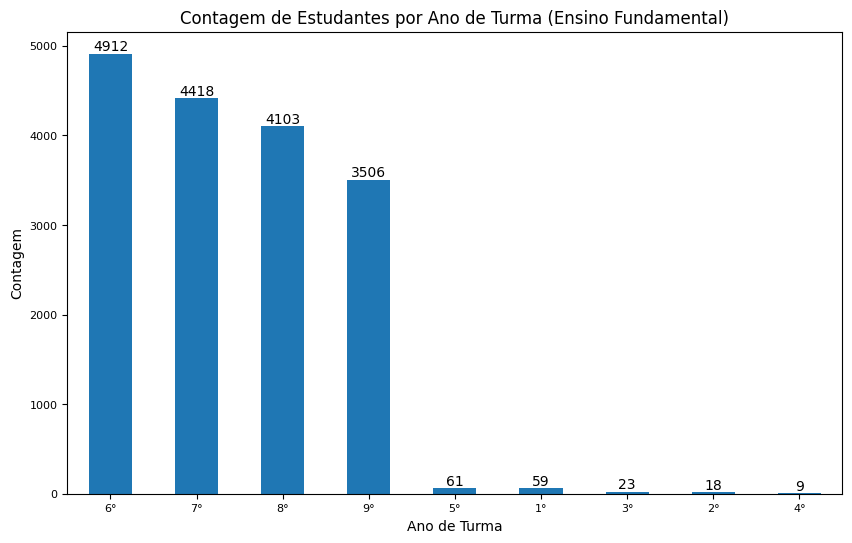

In [3]:
contagem_modalidades = td_dimensoes_fatores['ano_turma'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Contagem de Estudantes por Ano de Turma (Ensino Fundamental)') 
plt.xlabel('Ano de Turma') 
plt.ylabel('Contagem') 
plt.xticks(rotation=0)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [24]:
colunas = ['localizacao', 'dependencia_administrativa', 'uf']
df_escolas_2 = df_escolas[colunas]
df_escolas_2

localizacao dependencia_administrativa  uf
0        Urbana                  Municipal  PA
1        Urbana                  Municipal  PA
2        Urbana                  Municipal  PA
3         Rural                  Municipal  RN
4         Rural                  Municipal  PA
..          ...                        ...  ..
303      Urbana                  Municipal  PI
304       Rural                  Municipal  PA
305       Rural                  Municipal  BA
306       Rural                  Municipal  PA
307       Rural                  Municipal  PA

[308 rows x 3 columns]

In [25]:
# Contagem de escolas municipais e estaduais por estado
municipal_estadual_count = df_escolas_2.groupby(['uf', 'dependencia_administrativa']).size().unstack(fill_value=0)

# Contagem de escolas urbanas e rurais por estado
urbana_rural_count = df_escolas_2.groupby(['uf', 'localizacao']).size().unstack(fill_value=0)

print("Escolas Municipais e Estaduais por Estado:")
print(municipal_estadual_count)

print("\nEscolas Urbanas e Rurais por Estado:")
print(urbana_rural_count)

Escolas Municipais e Estaduais por Estado:
dependencia_administrativa  Estadual  Municipal
uf                                             
AL                                 0          7
AM                                 1          1
BA                                 0         26
CE                                 0         19
DF                                 1          0
ES                                 0          1
GO                                29          0
MA                                 0         21
MG                                13          1
MS                                 1          1
PA                                16         85
PB                                 0          4
PE                                 0          2
PI                                 0         16
RJ                                 0          2
RN                                 0          8
RR                                 4          0
SC                                 0         

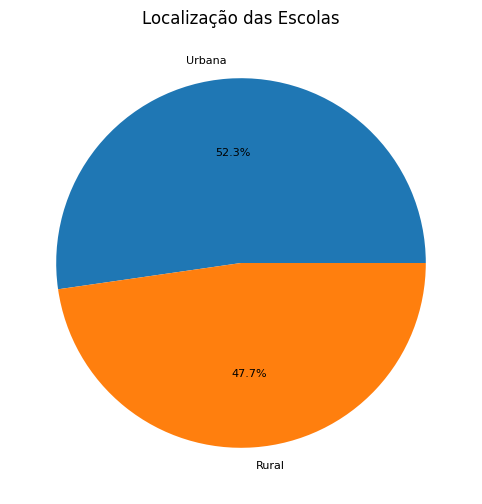

In [5]:
contagem_modalidades = df_escolas['localizacao'].value_counts()

plt.figure(figsize=(10, 6))
contagem_modalidades.plot(kind='pie', autopct='%1.1f%%', fontsize=8)
plt.title('Localização das Escolas')
plt.ylabel('')  # Remover o rótulo do eixo Y

plt.show()

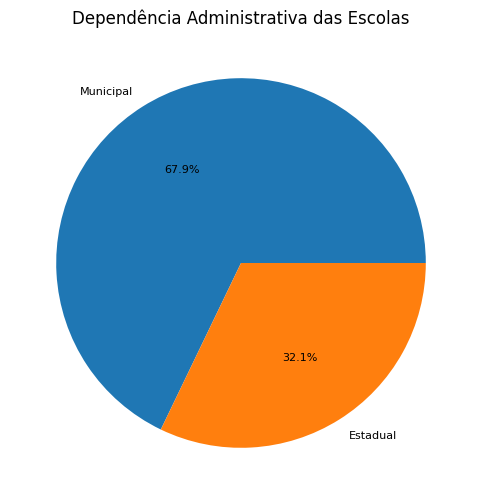

In [6]:
contagem_modalidades = df_escolas['dependencia_administrativa'].value_counts()

plt.figure(figsize=(10, 6))
contagem_modalidades.plot(kind='pie', autopct='%1.1f%%', fontsize=8)
plt.title('Dependência Administrativa das Escolas')
plt.ylabel('')  # Remover o rótulo do eixo Y

plt.show()

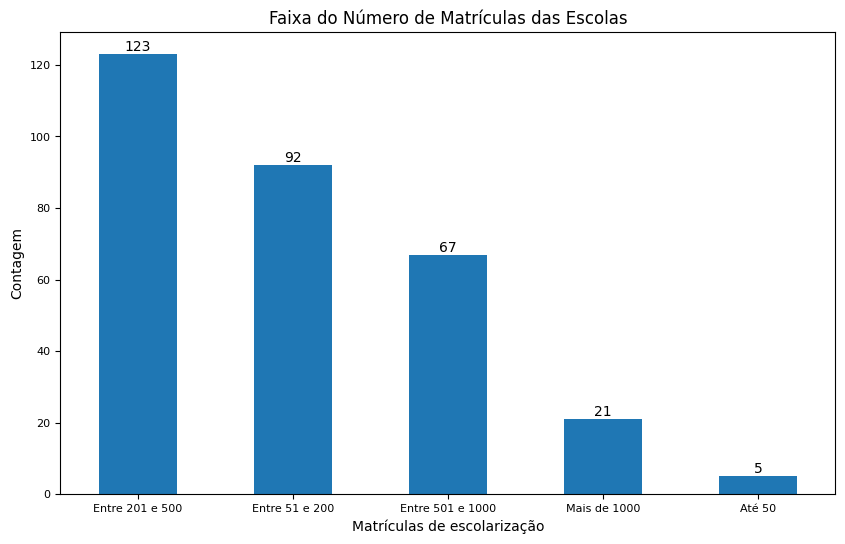

In [151]:
contagem_modalidades = df_escolas['porte_da_escola'].value_counts()

# Criar uma lista de rótulos personalizados removendo "de escolarização"
rotulos_personalizados = [x.replace(" matrículas de escolarização", "") for x in contagem_modalidades.index]

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8)
plt.title('Faixa do Número de Matrículas das Escolas') 
plt.xlabel('Matrículas de escolarização') 
plt.ylabel('Contagem') 

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Usar rótulos personalizados
ax.set_xticklabels(rotulos_personalizados, rotation=0)

plt.show()


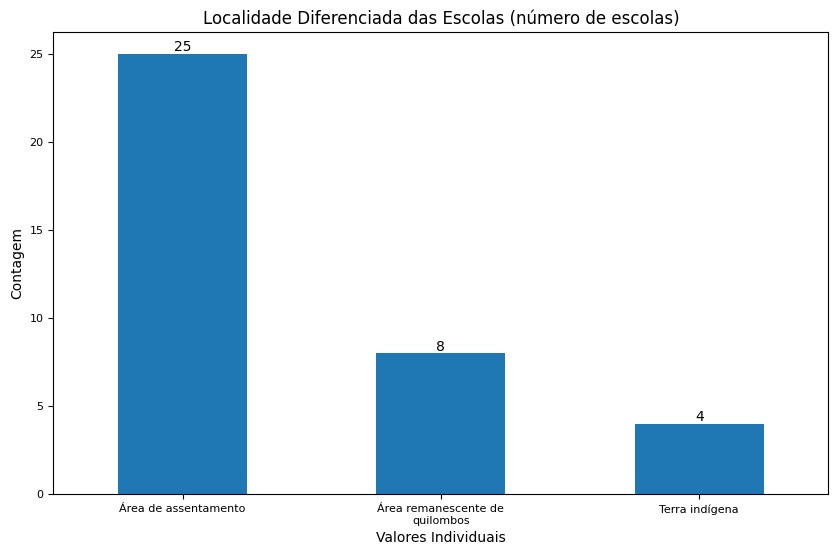

In [9]:
contagem_modalidades = df_escolas['localidade_diferenciada'].value_counts()

indice_max = contagem_modalidades.idxmax()

contagem_modalidades = contagem_modalidades.drop(index=indice_max)

plt.figure(figsize=(10, 6))
contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Localidade Diferenciada das Escolas (número de escolas)') 
plt.xlabel('Valores Individuais')
plt.ylabel('Contagem')

limite_largura_coluna = 20

rotulos_personalizados = [textwrap.fill(texto, limite_largura_coluna) for texto in contagem_modalidades.index]

ax = plt.gca()
ax.set_xticklabels(rotulos_personalizados, rotation=0)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

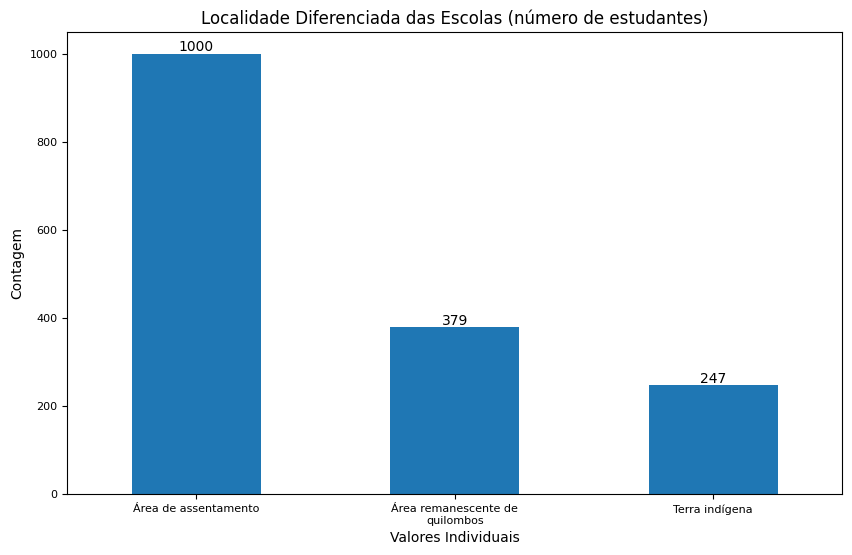

In [7]:
contagem_modalidades = td_dimensoes_fatores['localidade_diferenciada'].value_counts()

indice_max = contagem_modalidades.idxmax()

contagem_modalidades = contagem_modalidades.drop(index=indice_max)

plt.figure(figsize=(10, 6))
contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Localidade Diferenciada das Escolas (número de estudantes)') 
plt.xlabel('Valores Individuais')
plt.ylabel('Contagem')

limite_largura_coluna = 20

rotulos_personalizados = [textwrap.fill(texto, limite_largura_coluna) for texto in contagem_modalidades.index]

ax = plt.gca()
ax.set_xticklabels(rotulos_personalizados, rotation=0)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

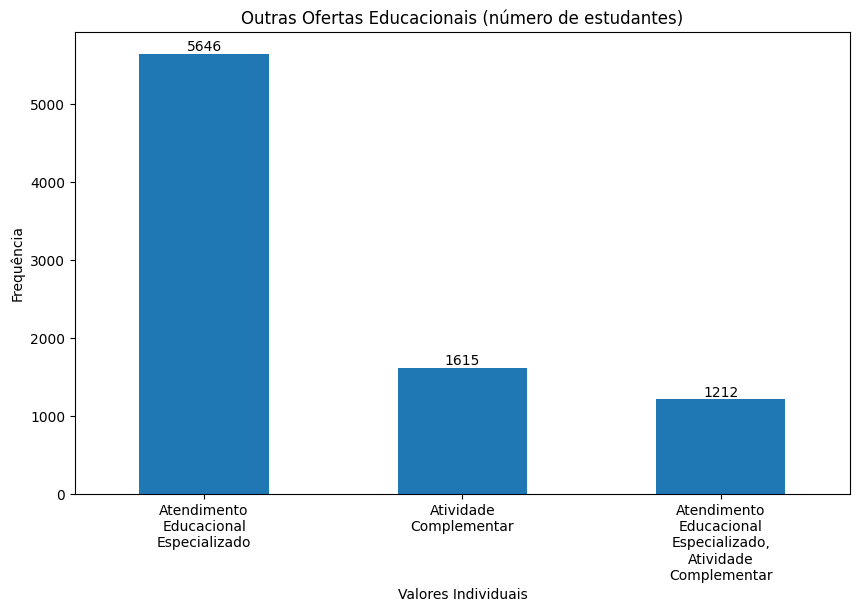

In [11]:
contagem_individual = td_dimensoes_fatores['outras_ofertas_educacionais'].value_counts()

plt.figure(figsize=(10, 6))
contagem_individual.plot(kind='bar')
plt.title('Outras Ofertas Educacionais (número de estudantes)')
plt.xlabel('Valores Individuais')
plt.ylabel('Frequência')

limite_largura_coluna = 15

rotulos_personalizados = [textwrap.fill(texto, limite_largura_coluna) for texto in contagem_individual.index]

ax = plt.gca()
ax.set_xticklabels(rotulos_personalizados, rotation=0)

for i, v in enumerate(contagem_individual):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

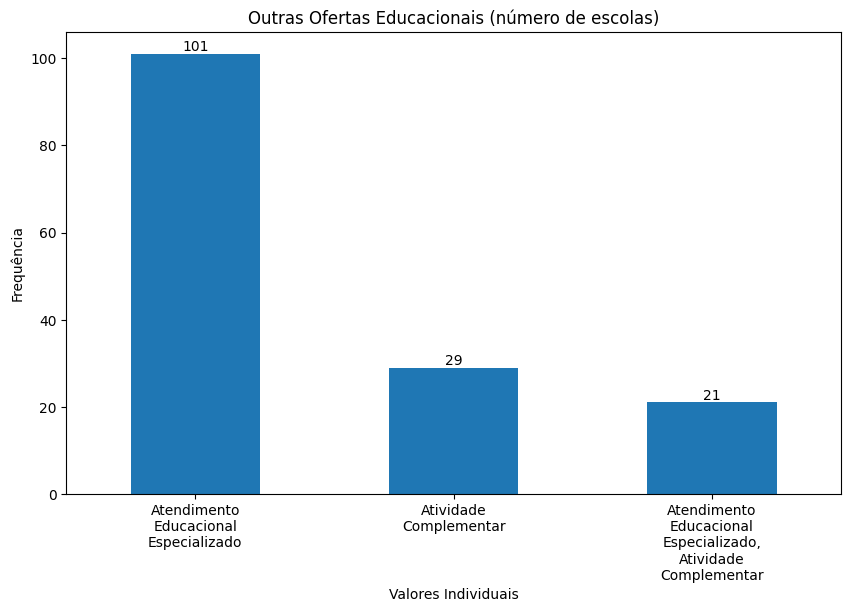

In [12]:
contagem_individual = df_escolas['outras_ofertas_educacionais'].value_counts()

plt.figure(figsize=(10, 6))
contagem_individual.plot(kind='bar')
plt.title('Outras Ofertas Educacionais (número de escolas)')
plt.xlabel('Valores Individuais')
plt.ylabel('Frequência')

limite_largura_coluna = 15

rotulos_personalizados = [textwrap.fill(texto, limite_largura_coluna) for texto in contagem_individual.index]

ax = plt.gca()
ax.set_xticklabels(rotulos_personalizados, rotation=0)

for i, v in enumerate(contagem_individual):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

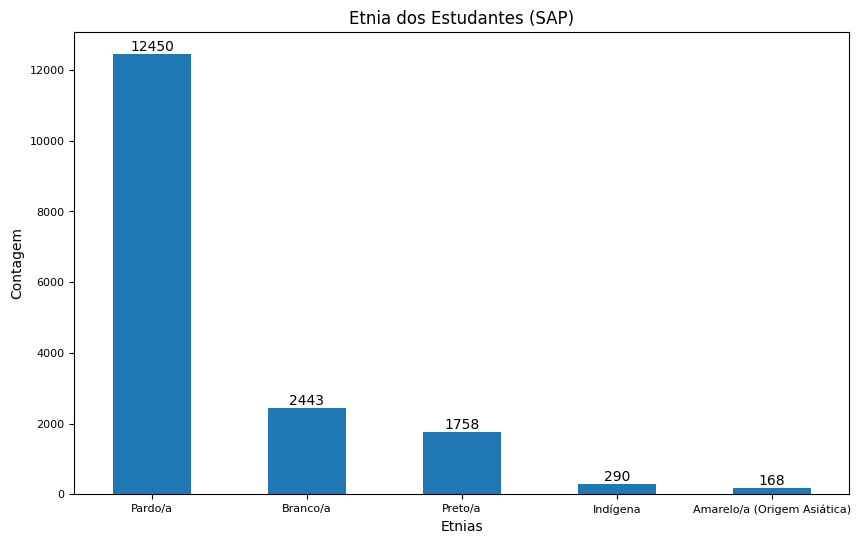

In [13]:
contagem_modalidades = td_dimensoes_fatores['etnia'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Etnia dos Estudantes (SAP)') 
plt.xlabel('Etnias') 
plt.ylabel('Contagem') 
plt.xticks(rotation=0)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')


plt.show()

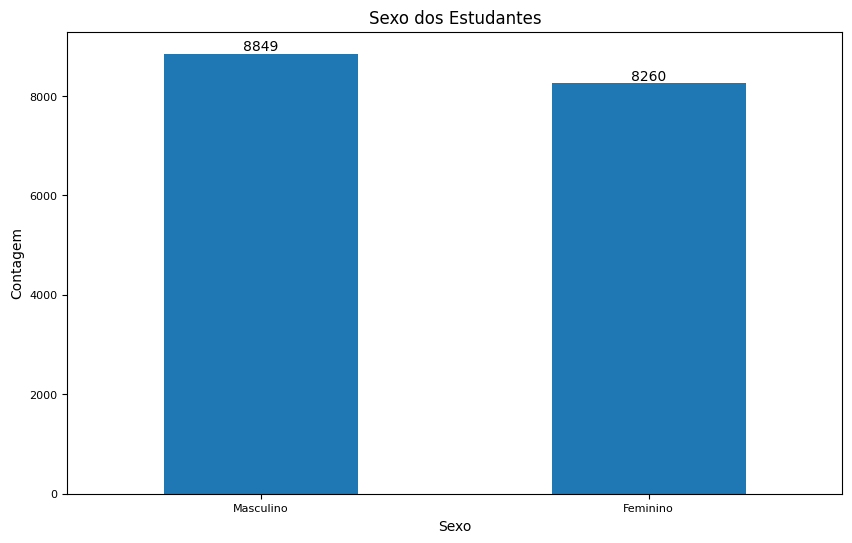

In [414]:
# Substituir os valores 1 e 2 por "masculino" e "feminino"
td_copia_sexo = td_dimensoes_fatores.copy()
td_copia_sexo['sexo'] = td_copia_sexo['sexo'].replace({1: 'Masculino', 2: 'Feminino'})

contagem_modalidades = td_copia_sexo['sexo'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Sexo dos Estudantes') 
plt.xlabel('Sexo') 
plt.ylabel('Contagem')

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


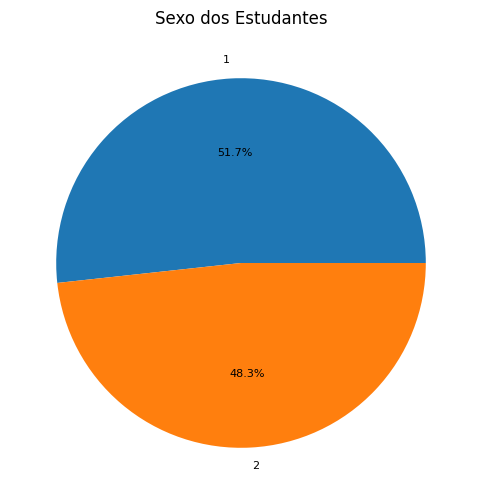

In [415]:
contagem_modalidades = td_dimensoes_fatores['sexo'].value_counts()

plt.figure(figsize=(10, 6))
contagem_modalidades.plot(kind='pie', autopct='%1.1f%%', fontsize=8)
plt.title('Sexo dos Estudantes')
plt.ylabel('')  # Remover o rótulo do eixo Y

plt.show()

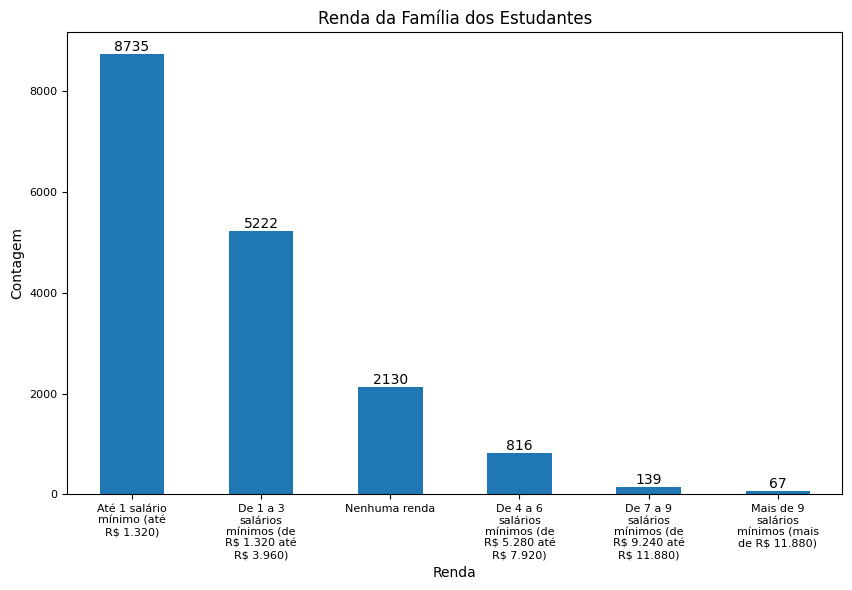

In [417]:
contagem_modalidades = td_dimensoes_fatores['renda'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Renda da Família dos Estudantes') 
plt.xlabel('Renda') 
plt.ylabel('Contagem')

limite_largura_coluna = 13

rotulos_personalizados = [textwrap.fill(texto, limite_largura_coluna) for texto in contagem_modalidades.index]
ax.set_xticklabels(rotulos_personalizados)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


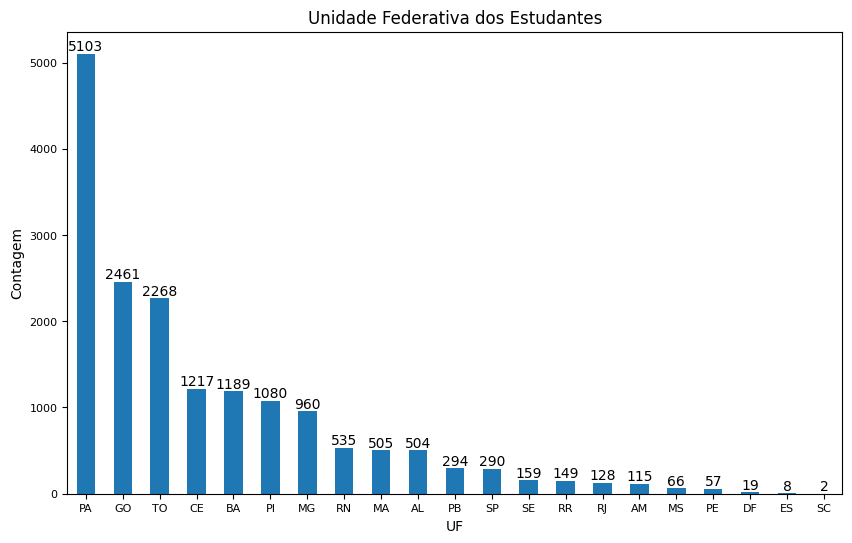

In [419]:
contagem_modalidades = td_dimensoes_fatores['uf'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Unidade Federativa dos Estudantes') 
plt.xlabel('UF') 



plt.ylabel('Contagem')

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


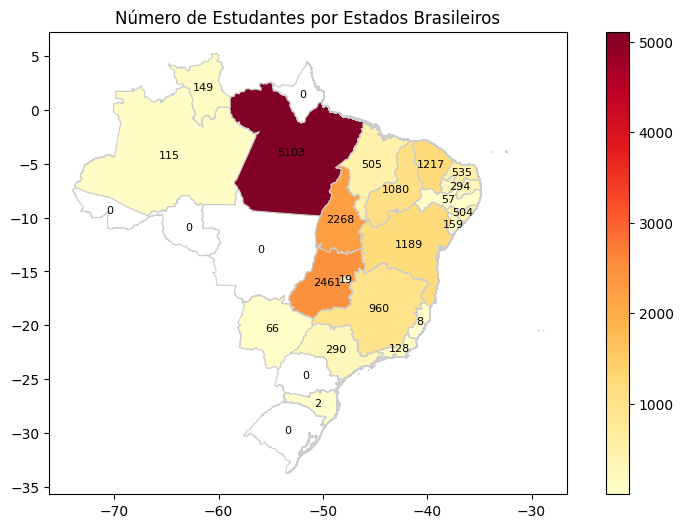

In [21]:
br_states = gpd.read_file('../../Databases/Geografia/brazil_geo.json')

estados_brasileiros = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

contagem_modalidades = td_dimensoes_fatores['uf'].value_counts()
contagem_modalidades = pd.DataFrame({'uf - valor': contagem_modalidades}).reset_index()
contagem_modalidades.columns = ['uf', 'valor']

estados_zerados = {'uf': ['AC', 'AP', 'MT', 'PR', 'RS', 'RO'], 'valor': [0, 0, 0, 0, 0, 0]}
novo_df = pd.DataFrame(estados_zerados)

contagem_modalidades = pd.concat([contagem_modalidades, novo_df], ignore_index=True)

# print(contagem_modalidades)

df = contagem_modalidades.reset_index()
br_states = br_states.merge(df, left_on='id', right_on='uf')

cmap = plt.colormaps['YlOrRd']
cmap.set_under('white')

plt.figure(figsize=(10, 6))
br_states.plot(column='valor', cmap=cmap, linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True, vmin=1)

for idx, row in br_states.iterrows():
    state_name = row['uf']
    value = row['valor']
    centroid = row['geometry'].centroid
    plt.text(centroid.x, centroid.y, str(value), fontsize=8, ha='center', va='center')

plt.title('Número de Estudantes por Estados Brasileiros')
plt.show()

In [7]:
td_dimensoes_fatores['localizacao']

0        Urbana
1        Urbana
2        Urbana
3        Urbana
4        Urbana
          ...  
17104    Urbana
17105    Urbana
17106    Urbana
17107    Urbana
17108    Urbana
Name: localizacao, Length: 17109, dtype: object

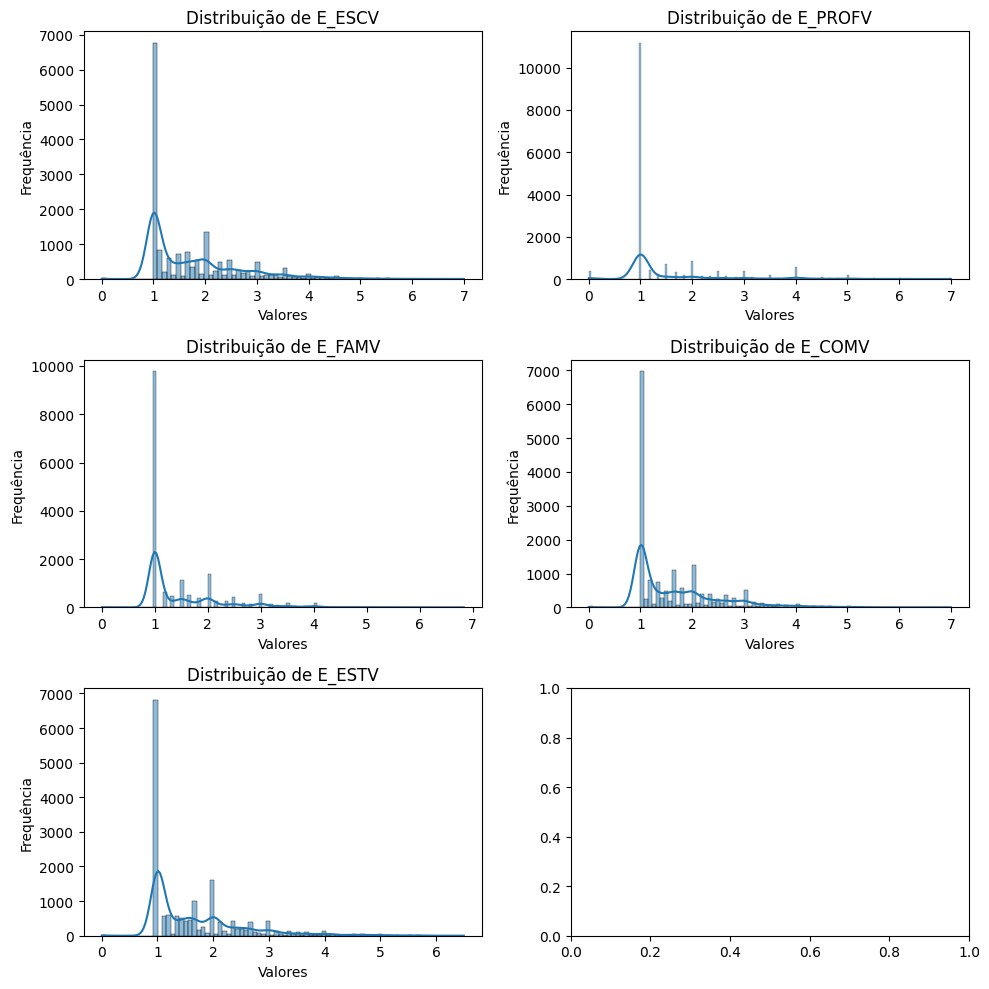

In [422]:
dimensoes_v = ['E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV']
df = td_dimensoes_fatores[dimensoes_v]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i, fator in enumerate(dimensoes_v):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=fator, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de {fator}')
    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

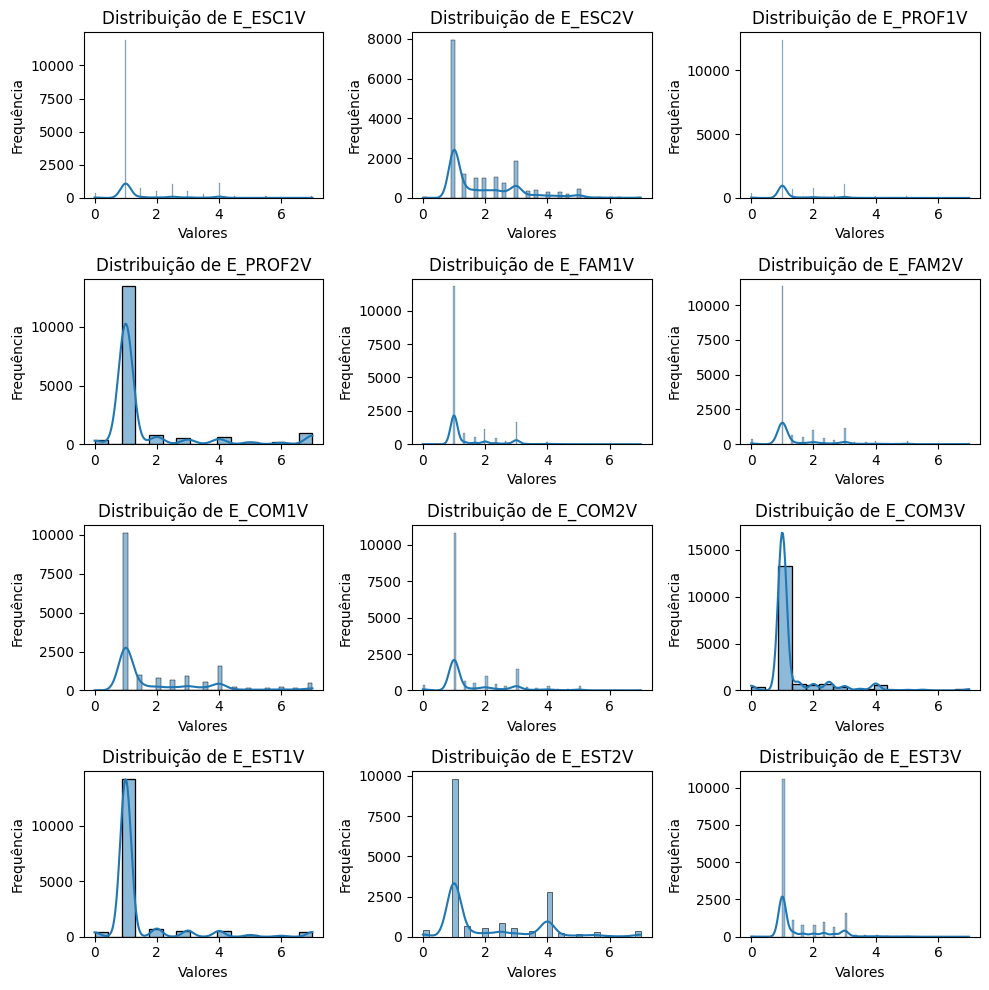

In [12]:
fatores_v = ["E_ESC1V","E_ESC2V","E_PROF1V","E_PROF2V","E_FAM1V","E_FAM2V","E_COM1V","E_COM2V","E_COM3V","E_EST1V","E_EST2V","E_EST3V"]
df = td_dimensoes_fatores[fatores_v]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for i, fator in enumerate(fatores_v):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=fator, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de {fator}')
    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

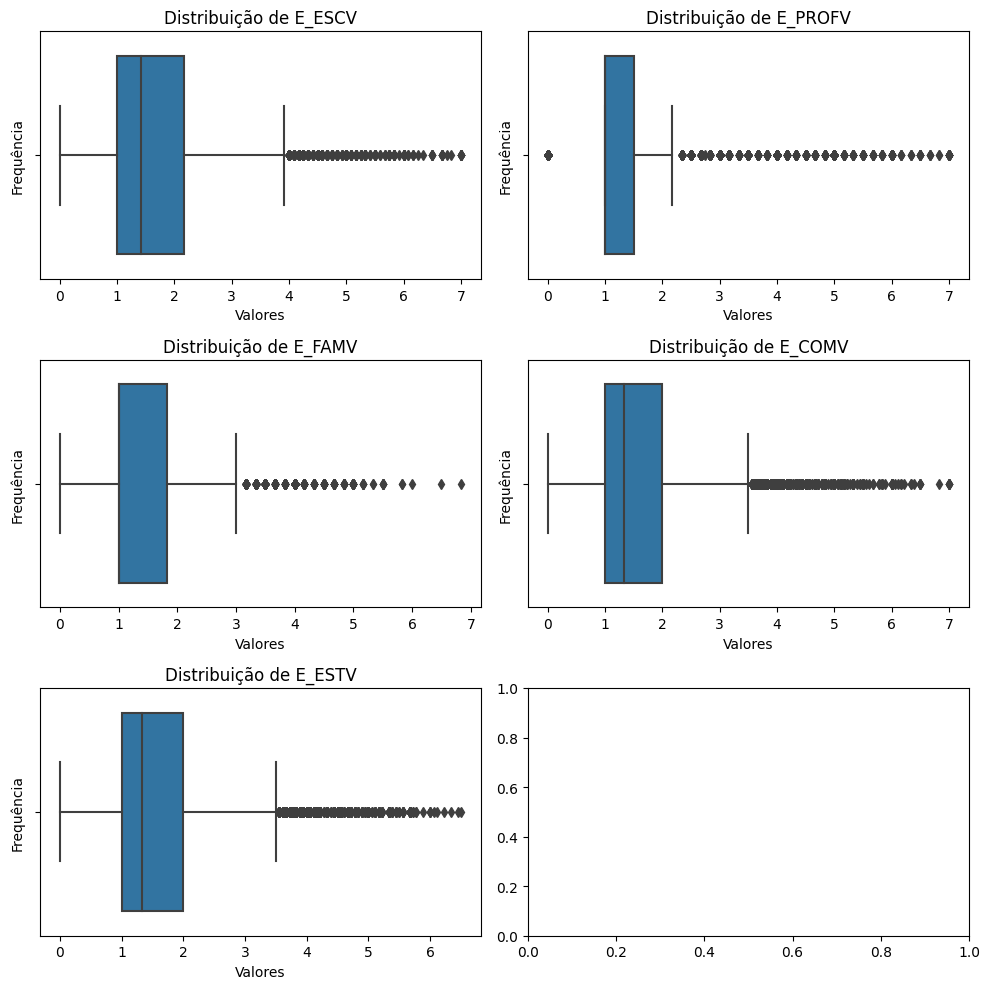

In [13]:
dimensoes_v = ['E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV']
df = td_dimensoes_fatores[dimensoes_v]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i, fator in enumerate(dimensoes_v):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df, x=fator, ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de {fator}')
    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

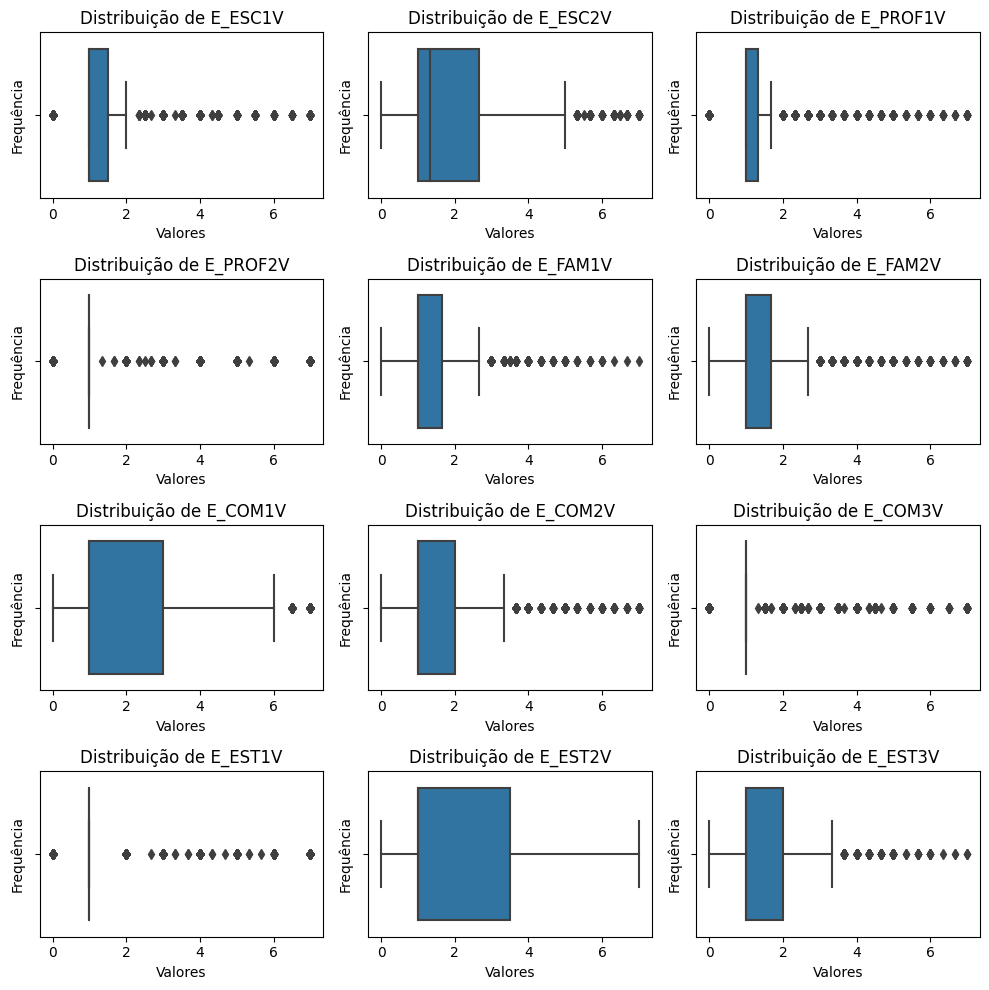

In [14]:
fatores_v = ["E_ESC1V","E_ESC2V","E_PROF1V","E_PROF2V","E_FAM1V","E_FAM2V","E_COM1V","E_COM2V","E_COM3V","E_EST1V","E_EST2V","E_EST3V"]
df = td_dimensoes_fatores[fatores_v]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for i, fator in enumerate(fatores_v):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, x=fator, ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de {fator}')
    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [16]:
stats_df = pd.DataFrame(columns=["Fator", "Média", "Desvio Padrão", "Mediana", "Mínimo", "Máximo"])

for fator in fatores_v:
    media = df[fator].mean()
    desvio_padrao = df[fator].std()
    mediana = df[fator].median()
    minimo = df[fator].min()
    maximo = df[fator].max()
    
    stats_df = pd.concat([stats_df, pd.DataFrame({"Fator": [fator], "Média": [media], "Desvio Padrão": [desvio_padrao], "Mediana": [mediana], "Mínimo": [minimo], "Máximo": [maximo]})], ignore_index=True)

print(stats_df)

       Fator     Média  Desvio Padrão   Mediana  Mínimo  Máximo
0    E_ESC1V  1.567469       1.187482  1.000000     0.0     7.0
1    E_ESC2V  1.926033       1.194067  1.333333     0.0     7.0
2   E_PROF1V  1.387515       0.928115  1.000000     0.0     7.0
3   E_PROF2V  1.622119       1.603368  1.000000     0.0     7.0
4    E_FAM1V  1.431537       0.788930  1.000000     0.0     7.0
5    E_FAM2V  1.520058       1.062425  1.000000     0.0     7.0
6    E_COM1V  2.011573       1.588832  1.000000     0.0     7.0
7    E_COM2V  1.596665       1.117765  1.000000     0.0     7.0
8    E_COM3V  1.349514       0.963546  1.000000     0.0     7.0
9    E_EST1V  1.390223       1.224664  1.000000     0.0     7.0
10   E_EST2V  2.033257       1.571482  1.000000     0.0     7.0
11   E_EST3V  1.525026       0.844181  1.000000     0.0     7.0


# Machine learning

In [4]:
todas_dimensoes = ['id_raca_etnia', 'id_renda_familiar', 'sexo',
            'id_escola', 'ano_turma', 'localidade_diferenciada',
            'categoria_administrativa', 'dependencia_administrativa', 'categoria_escola',
            'conveniada_poder_publico', 'regulamentacao_pelo_conselho', 'porte_da_escola',
            'outras_ofertas_educacionais', 'uf', 'municipio', 'localizacao',
            'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
            'E_ESC1V','E_ESC2V','E_PROF1V','E_PROF2V','E_FAM1V','E_FAM2V','E_COM1V',
            'E_COM2V','E_COM3V','E_EST1V','E_EST2V','E_EST3V'
            ]

df_ml = td_dimensoes_fatores.copy()

variaveis = [
    'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
    'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V', 'E_FAM2V', 'E_COM1V',
    'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V', 'E_EST3V'
]

variaveis_dimensoes = [
    'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
]

variaveis_fatores = [
    'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V', 'E_FAM2V', 'E_COM1V',
    'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V', 'E_EST3V'
]

# Função para arredondar para o intervalo [0, 7]
def round_to_interval(value):
    return np.clip(np.round(value), 0, 7)

# Aplicar a função a cada coluna na lista de variaveis
for coluna in variaveis:
    df_ml.loc[:, coluna] = df_ml[coluna].apply(round_to_interval).astype(int)

td_para_modelo = df_ml[todas_dimensoes]

le = LabelEncoder()

columns_to_encode = ['ano_turma', 'localidade_diferenciada', 'categoria_administrativa', 'dependencia_administrativa',
                     'categoria_escola', 'conveniada_poder_publico', 'regulamentacao_pelo_conselho', 'porte_da_escola',
                     'outras_ofertas_educacionais', 'uf', 'municipio', 'localizacao']

for column in columns_to_encode:
    td_para_modelo[column] = le.fit_transform(td_para_modelo[column])


encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(td_para_modelo[columns_to_encode])
X_test_encoded = encoder.transform(td_para_modelo[columns_to_encode])

C:\Users\daniv\AppData\Local\Temp\ipykernel_17724\705699589.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_para_modelo[column] = le.fit_transform(td_para_modelo[column])
C:\Users\daniv\AppData\Local\Temp\ipykernel_17724\705699589.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_para_modelo[column] = le.fit_transform(td_para_modelo[column])
C:\Users\daniv\AppData\Local\Temp\ipykernel_17724\705699589.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [5]:
def amostrar_para_equilibrar(df, string_de_var):
    df_copy_balanco_duplicando = df.copy()

    # Encontrar o valor mais frequente
    maior_numero = df_copy_balanco_duplicando[string_de_var].value_counts().max()

    # Loop sobre os valores únicos na coluna
    for valor in df_copy_balanco_duplicando[string_de_var].unique():
        # Calcular o número de amostras necessárias
        amostras_necessarias = maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[valor]

        # Realizar amostragem para equilibrar as classes
        if amostras_necessarias > 0:
            df_classe = df_copy_balanco_duplicando[df_copy_balanco_duplicando[string_de_var] == valor]
            df_amostras = df_classe.sample(amostras_necessarias, replace=True)
            df_copy_balanco_duplicando = pd.concat([df_copy_balanco_duplicando, df_amostras], ignore_index=True)

    return df_copy_balanco_duplicando

K VIZINHOS PRÓXIMOS - E_ESCV
Acurácia: 0.918172691	 Precisão: 0.916076051	 Recall: 0.918172691	 F1 Score: 0.916249036
[[1523  187   16    8    2    0    0]
 [ 296 1137  202   54    2    0    0]
 [   4  114 1525   62    8    2    0]
 [   0    3   18 1671    0    0    0]
 [   0    0    0    0 1729    0    0]
 [   0    0    0    0    0 1709    0]
 [   0    0    0    0    0    0 1680]]


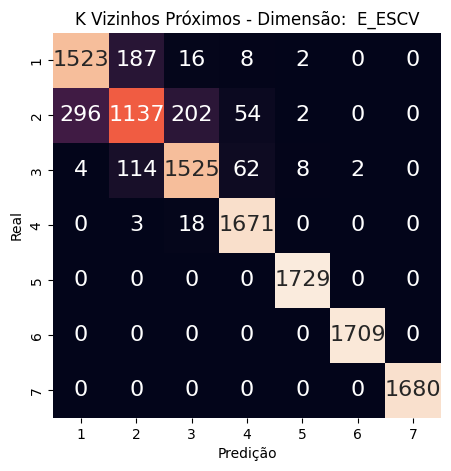

--------------------------

K VIZINHOS PRÓXIMOS - E_PROFV
Acurácia: 0.967868339	 Precisão: 0.967666772	 Recall: 0.967868339	 F1 Score: 0.967675340
[[2098  270   10    1    0    0    0]
 [ 179 2109   54   14    0    1    0]
 [   0    0 2363    0    0    0    0]
 [   0    3    1 2373    0    0    0]
 [   0    0    0    0 2359    0    0]
 [   0    0    0    0    0 2400    0]
 [   0    0    0    0    0    0 2353]]


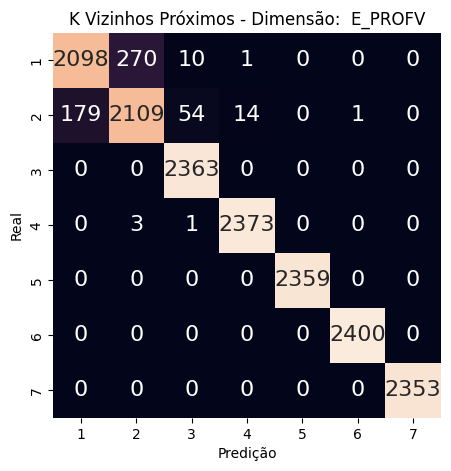

--------------------------

K VIZINHOS PRÓXIMOS - E_FAMV
Acurácia: 0.947838068	 Precisão: 0.946837721	 Recall: 0.947838068	 F1 Score: 0.946840970
[[1986  254   15    6    0    0    0]
 [ 295 1710  162   37    0    0    0]
 [   2   20 2199    4    0    0    0]
 [   0    0    0 2106    0    0    0]
 [   0    0    0    0 2131    0    0]
 [   0    0    0    0    0 2143    0]
 [   0    0    0    0    0    0 2171]]


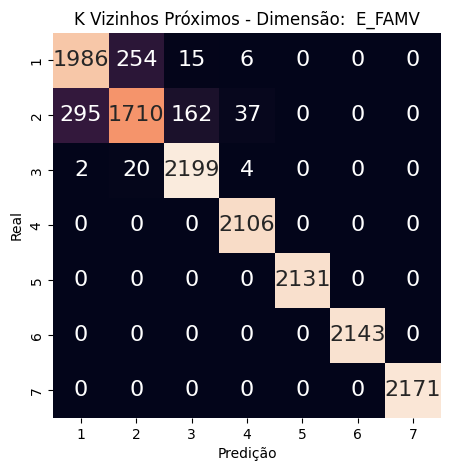

--------------------------

K VIZINHOS PRÓXIMOS - E_COMV
Acurácia: 0.944678856	 Precisão: 0.944004918	 Recall: 0.944678856	 F1 Score: 0.943934387
[[1690  129   10    0    0    0    0]
 [ 240 1429  157   12    0    1    0]
 [   7  111 1707   37    4    0    0]
 [   0    0    0 1761    0    0    0]
 [   0    0    0    0 1789    0    0]
 [   0    0    0    0    0 1813    0]
 [   0    0    0    0    0    0 1901]]


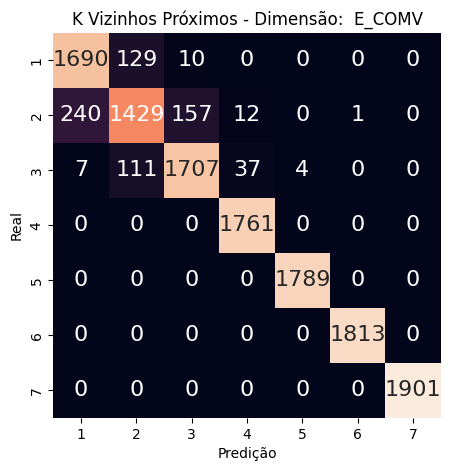

--------------------------

K VIZINHOS PRÓXIMOS - E_ESTV
Acurácia: 0.941665905	 Precisão: 0.940925954	 Recall: 0.941665905	 F1 Score: 0.940882143
[[1664  136    8    0    0    0]
 [ 210 1418  160    8    2    0]
 [   6   80 1765   26    2    0]
 [   0    0    0 1855    0    0]
 [   0    0    0    0 1785    0]
 [   0    0    0    0    0 1812]]


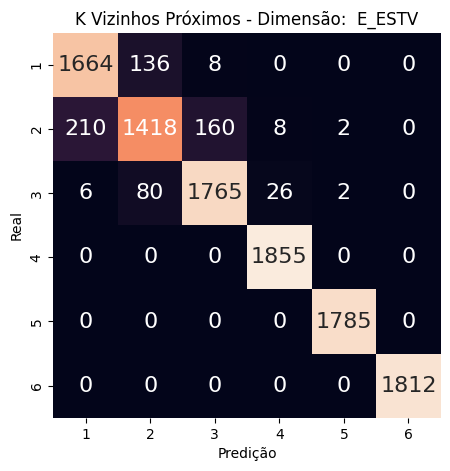

In [251]:
variaveis_dimensoes = [
    'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
]

variaveis_dimensoes_aux = [
    'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV'
]

for d in variaveis_dimensoes_aux:
    get_confusion_dimensoes_knn(d)

get_confusion_dimensoes_knn_less_6('E_ESTV')

In [207]:
def get_confusion_dimensoes(string_de_var):
        df_copy = td_para_modelo.copy()
        variaveis_dimensoes.remove(string_de_var)
        df_copy.drop(columns=variaveis_dimensoes, inplace=True)
        df_copy.drop(columns=variaveis_fatores, inplace=True)
        df_copy = df_copy.loc[df_copy[string_de_var] != 0]
        df_copy_balanco_duplicando = df_copy.copy()

        maior_numero = df_copy_balanco_duplicando[string_de_var].value_counts().max()

        df_pra_7 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 7].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[7.0], replace=True)
        df_pra_6 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 6].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[6.0], replace=True)
        df_pra_5 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 5].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[5.0], replace=True)
        df_pra_4 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 4].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[4.0], replace=True)
        df_pra_3 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 3].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[3.0], replace=True)
        df_pra_2 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 2].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[2.0], replace=True)

        df_copy_balanco_duplicando = pd.concat([df_pra_7, df_pra_6, df_pra_5, df_pra_4, df_pra_3, df_pra_2, df_copy_balanco_duplicando], ignore_index=True)

        df_copy_balanco_duplicando.groupby(string_de_var).count()

        X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns=string_de_var), df_copy_balanco_duplicando[string_de_var], test_size=0.2)
        model = DecisionTreeClassifier(class_weight='balanced')

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        variaveis_dimensoes.insert(0,string_de_var)

        print("DECISION TREE - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        print(confusion)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='Decision Tree - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")

        model = RandomForestClassifier(class_weight='balanced')

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        print("RANDOM FOREST - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))
        
        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='Teste - Random Forest - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")

        model = AdaBoostClassifier()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        print("ADABOOST - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))
        
        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='Teste - Ada Boost - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")
        
        model = CategoricalNB()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)


        print("NAIVE BAYES CATEGÓRICO - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='Teste - Naive Bayes Categórico - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        variaveis_dimensoes.insert(0,string_de_var)

In [213]:
def get_confusion_dimensoes_less_6(string_de_var):
        df_copy = td_para_modelo.copy()
        variaveis_dimensoes.remove(string_de_var)
        df_copy.drop(columns=variaveis_dimensoes, inplace=True)
        df_copy.drop(columns=variaveis_fatores, inplace=True)
        df_copy = df_copy.loc[df_copy[string_de_var] != 0]
        df_copy_balanco_duplicando = df_copy.copy()

        maior_numero = df_copy_balanco_duplicando[string_de_var].value_counts().max()

        # df_pra_7 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 7].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[7.0], replace=True)
        df_pra_6 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 6].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[6.0], replace=True)
        df_pra_5 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 5].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[5.0], replace=True)
        df_pra_4 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 4].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[4.0], replace=True)
        df_pra_3 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 3].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[3.0], replace=True)
        df_pra_2 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 2].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[2.0], replace=True)

        df_copy_balanco_duplicando = pd.concat([df_pra_6, df_pra_5, df_pra_4, df_pra_3, df_pra_2, df_copy_balanco_duplicando], ignore_index=True)

        df_copy_balanco_duplicando.groupby(string_de_var).count()

        X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns=string_de_var), df_copy_balanco_duplicando[string_de_var], test_size=0.2)
        model = DecisionTreeClassifier(class_weight='balanced')

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        variaveis_dimensoes.insert(0,string_de_var)

        print("DECISION TREE - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        print(confusion)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                yticklabels=['1', '2', '3', '4', '5', '6'], xticklabels=['1', '2', '3', '4', '5', '6'], ax=ax1)
        ax1.set(title='Decision Tree - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")

        model = RandomForestClassifier(class_weight='balanced')

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        print("RANDOM FOREST - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))
        
        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6'], xticklabels=['1', '2', '3', '4', '5', '6'], ax=ax1)
        ax1.set(title='Teste - Random Forest - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")

        model = AdaBoostClassifier()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        print("ADABOOST - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))
        
        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6'], xticklabels=['1', '2', '3', '4', '5', '6'], ax=ax1)
        ax1.set(title='Teste - Ada Boost - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")
        
        model = CategoricalNB()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)


        print("NAIVE BAYES CATEGÓRICO - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6'], xticklabels=['1', '2', '3', '4', '5', '6'], ax=ax1)
        ax1.set(title='Teste - Naive Bayes Categórico - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        variaveis_dimensoes.insert(0,string_de_var)

In [241]:
def get_confusion_fatores(string_de_var):
        df_copy = td_para_modelo.copy()
        variaveis_fatores.remove(string_de_var)
        df_copy.drop(columns=variaveis_dimensoes, inplace=True)
        df_copy.drop(columns=variaveis_fatores, inplace=True)
        df_copy = df_copy.loc[df_copy[string_de_var] != 0]
        df_copy_balanco_duplicando = df_copy.copy()

        maior_numero = df_copy_balanco_duplicando[string_de_var].value_counts().max()

        df_pra_7 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 7].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[7.0], replace=True)
        df_pra_6 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 6].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[6.0], replace=True)
        df_pra_5 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 5].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[5.0], replace=True)
        df_pra_4 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 4].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[4.0], replace=True)
        df_pra_3 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 3].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[3.0], replace=True)
        df_pra_2 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 2].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[2.0], replace=True)

        df_copy_balanco_duplicando = pd.concat([df_pra_7, df_pra_6, df_pra_5, df_pra_4, df_pra_3, df_pra_2, df_copy_balanco_duplicando], ignore_index=True)

        df_copy_balanco_duplicando.groupby(string_de_var).count()

        X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns=string_de_var), df_copy_balanco_duplicando[string_de_var], test_size=0.2)
        model = DecisionTreeClassifier(class_weight='balanced')

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        variaveis_dimensoes.insert(0,string_de_var)

        print("DECISION TREE - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        print(confusion)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='Decision Tree - Fator:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")

        model = RandomForestClassifier(class_weight='balanced')

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        print("RANDOM FOREST - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))
        
        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='Teste - Random Forest - Fator:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")

        model = AdaBoostClassifier()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        print("ADABOOST - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))
        
        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='Teste - Ada Boost - Fator:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")
        
        model = CategoricalNB()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)


        print("NAIVE BAYES CATEGÓRICO - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        confusion_matrix(y_test, y_pred)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                        yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='Teste - Naive Bayes Categórico - Fator:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        variaveis_dimensoes.insert(0,string_de_var)

DECISION TREE - E_ESC1V
Acurácia: 0.973298932	 Precisão: 0.974228894	 Recall: 0.973298932	 F1 Score: 0.972954891
[[2108  240   30   68    3    2    0]
 [  38 2329   28   12    0    0    0]
 [   0   10 2357    0    0    0    0]
 [   0    2   12 2348    0    0    0]
 [   0    0    0    0 2335    0    0]
 [   0    0    0    0    0 2332    0]
 [   0    0    0    0    0    0 2412]]


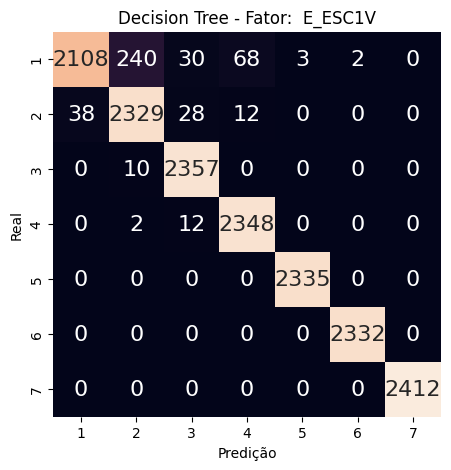

--------------------------

RANDOM FOREST - E_ESC1V
Acurácia: 0.979659186	 Precisão: 0.980308426	 Recall: 0.979659186	 F1 Score: 0.979535759


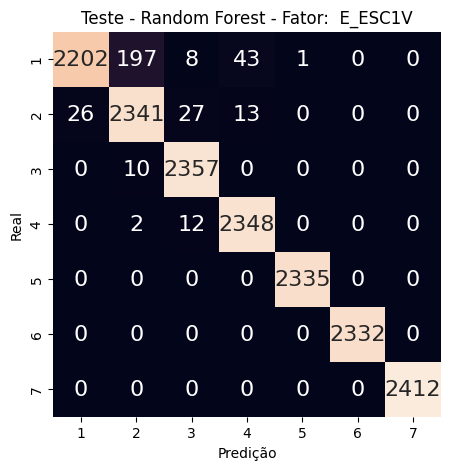

--------------------------

ADABOOST - E_ESC1V
Acurácia: 0.358454338	 Precisão: 0.342833509	 Recall: 0.358454338	 F1 Score: 0.320662206


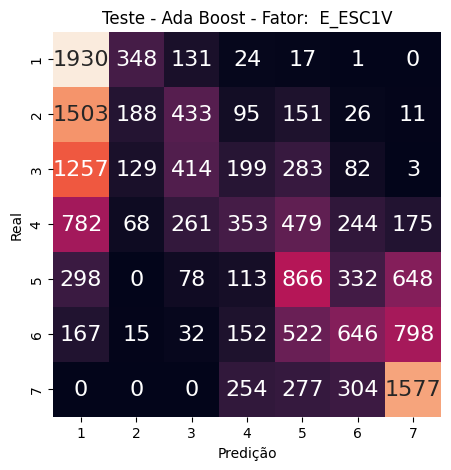

--------------------------

NAIVE BAYES CATEGÓRICO - E_ESC1V
Acurácia: 0.561202448	 Precisão: 0.555537424	 Recall: 0.561202448	 F1 Score: 0.556714967


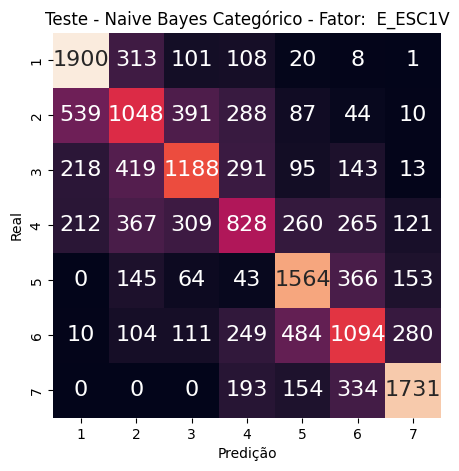

DECISION TREE - E_ESC2V
Acurácia: 0.957975316	 Precisão: 0.958817154	 Recall: 0.957975316	 F1 Score: 0.957990201
[[1594  209   13    0    0    0    0]
 [  70 1649   87   12    1    0    0]
 [   4   78 1688   54    3    0    0]
 [   0    0    2 1822    5    0    0]
 [   0    0    0    0 1811    0    0]
 [   0    0    0    0    0 1894    0]
 [   0    0    0    0    0    0 1806]]


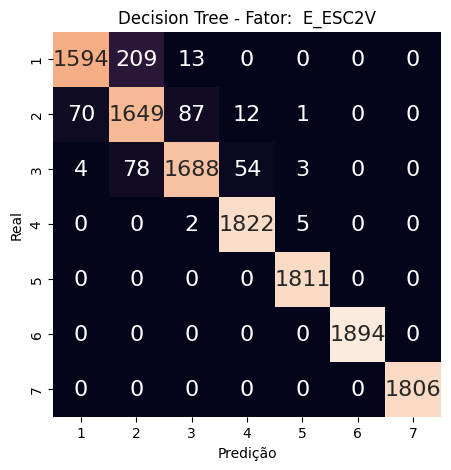

--------------------------

RANDOM FOREST - E_ESC2V
Acurácia: 0.964458678	 Precisão: 0.964734405	 Recall: 0.964458678	 F1 Score: 0.964430198


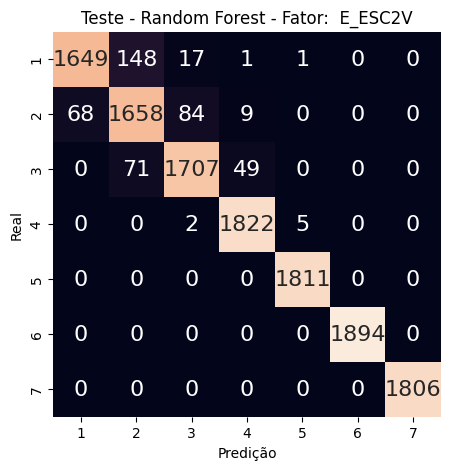

--------------------------

ADABOOST - E_ESC2V
Acurácia: 0.362599594	 Precisão: 0.408169540	 Recall: 0.362599594	 F1 Score: 0.330145255


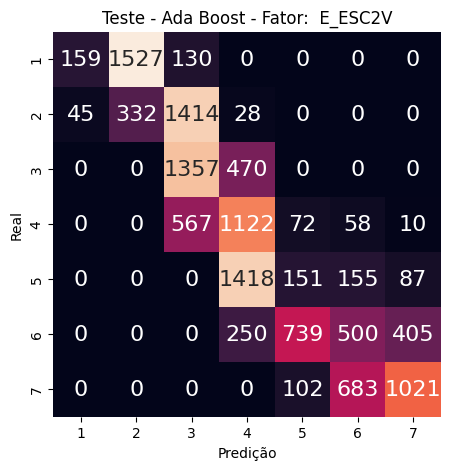

--------------------------

NAIVE BAYES CATEGÓRICO - E_ESC2V
Acurácia: 0.563427589	 Precisão: 0.555158840	 Recall: 0.563427589	 F1 Score: 0.558275101


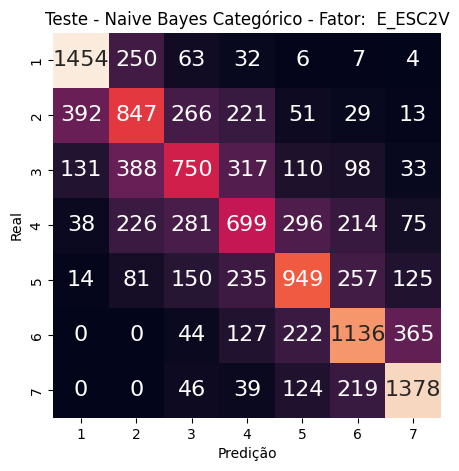

DECISION TREE - E_PROF1V
Acurácia: 0.985004378	 Precisão: 0.985474842	 Recall: 0.985004378	 F1 Score: 0.984873283
[[2368  143   54   17    8    6    1]
 [  11 2567   12    1    0    0    0]
 [   0   20 2566    1    0    0    0]
 [   0    0    0 2602    0    0    0]
 [   0    0    0    0 2561    0    0]
 [   0    0    0    0    0 2642    0]
 [   0    0    0    0    0    0 2692]]


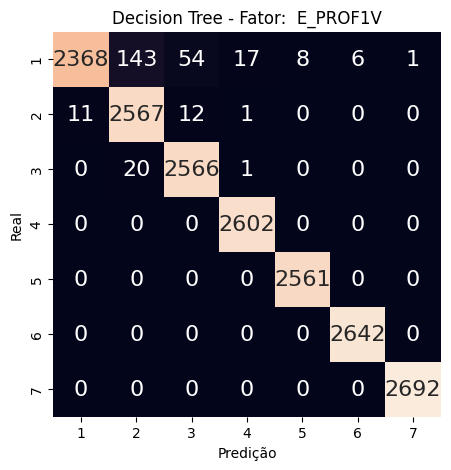

--------------------------

RANDOM FOREST - E_PROF1V
Acurácia: 0.988178634	 Precisão: 0.988461239	 Recall: 0.988178634	 F1 Score: 0.988120343


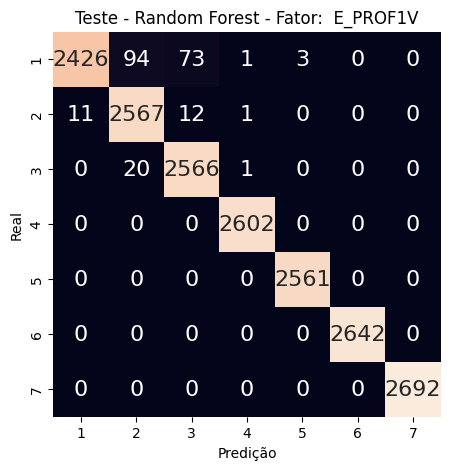

--------------------------

ADABOOST - E_PROF1V
Acurácia: 0.439306042	 Precisão: 0.444431554	 Recall: 0.439306042	 F1 Score: 0.430396321


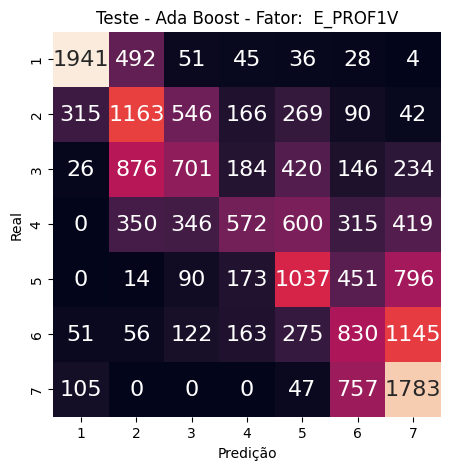

--------------------------

NAIVE BAYES CATEGÓRICO - E_PROF1V
Acurácia: 0.637259194	 Precisão: 0.638644712	 Recall: 0.637259194	 F1 Score: 0.635457652


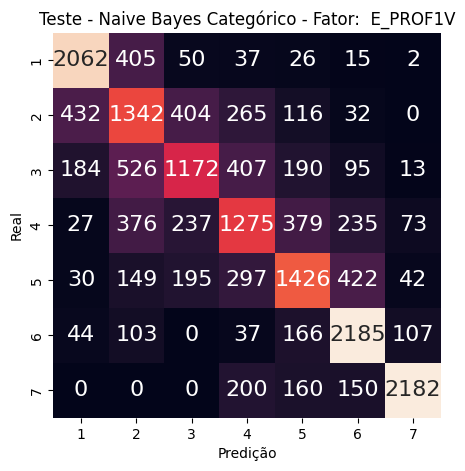

DECISION TREE - E_PROF2V
Acurácia: 0.995594947	 Precisão: 0.995617592	 Recall: 0.995594947	 F1 Score: 0.995594299
[[2597   25   13    0    0    0    0]
 [   0 2675   14    3    0    0    0]
 [   0    7 2713    6    0    0    0]
 [   0    0    0 2708    0    0    0]
 [   0    0    0    0 2706    0    0]
 [   0    0    0    0    0 2743    0]
 [   0    0    0    0    0   15 2617]]


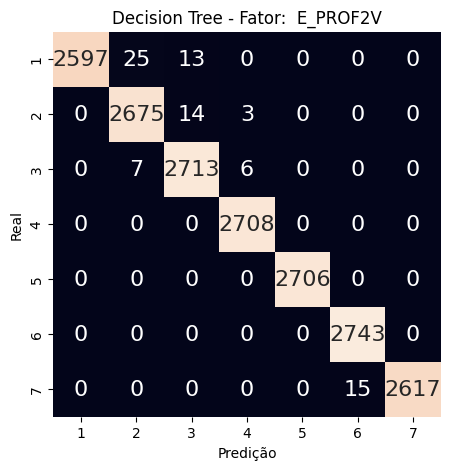

--------------------------

RANDOM FOREST - E_PROF2V
Acurácia: 0.996337968	 Precisão: 0.996351606	 Recall: 0.996337968	 F1 Score: 0.996338277


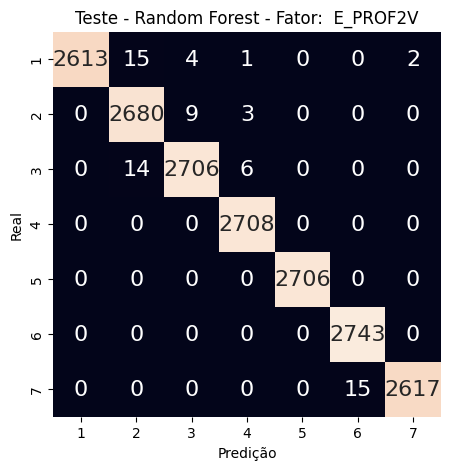

--------------------------

ADABOOST - E_PROF2V
Acurácia: 0.371563528	 Precisão: 0.429579049	 Recall: 0.371563528	 F1 Score: 0.339875124


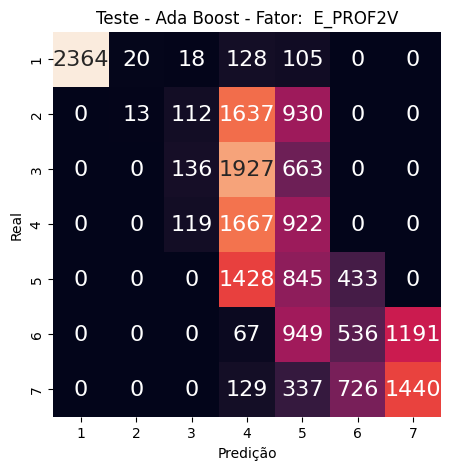

--------------------------

NAIVE BAYES CATEGÓRICO - E_PROF2V
Acurácia: 0.616813502	 Precisão: 0.610137577	 Recall: 0.616813502	 F1 Score: 0.611076953


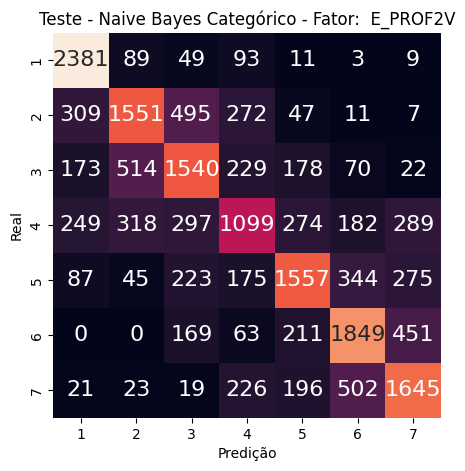

DECISION TREE - E_FAM1V
Acurácia: 0.981763607	 Precisão: 0.982526522	 Recall: 0.981763607	 F1 Score: 0.981566092
[[2248  178   84   13    0    0    0]
 [  12 2472   13    2    0    0    0]
 [   0   13 2465    7    0    0    0]
 [   0    0    0 2535    0    0    0]
 [   0    0    0    0 2531    0    0]
 [   0    0    0    0    0 2497    0]
 [   0    0    0    0    0    0 2587]]


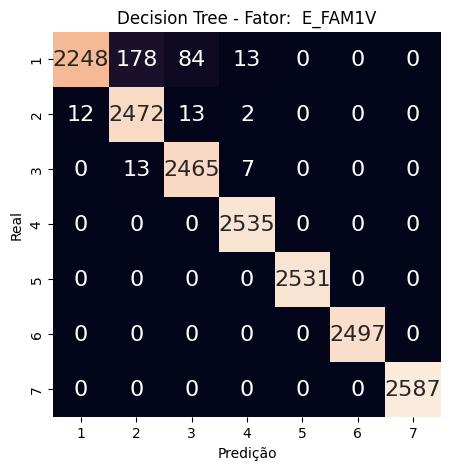

--------------------------

RANDOM FOREST - E_FAM1V
Acurácia: 0.982499858	 Precisão: 0.983288480	 Recall: 0.982499858	 F1 Score: 0.982314134


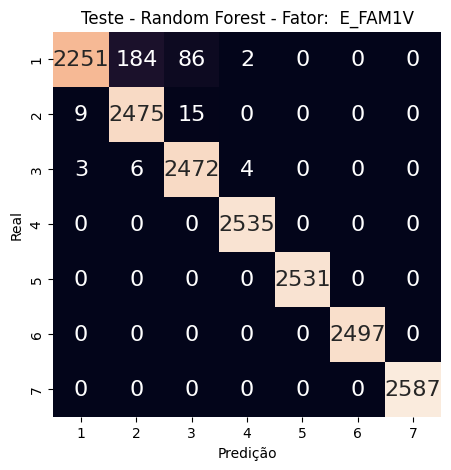

--------------------------

ADABOOST - E_FAM1V
Acurácia: 0.517981537	 Precisão: 0.805497664	 Recall: 0.517981537	 F1 Score: 0.415171182


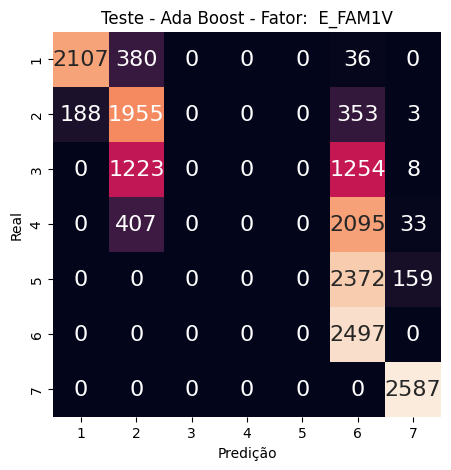

--------------------------

NAIVE BAYES CATEGÓRICO - E_FAM1V
Acurácia: 0.750127428	 Precisão: 0.744078395	 Recall: 0.750127428	 F1 Score: 0.745922676


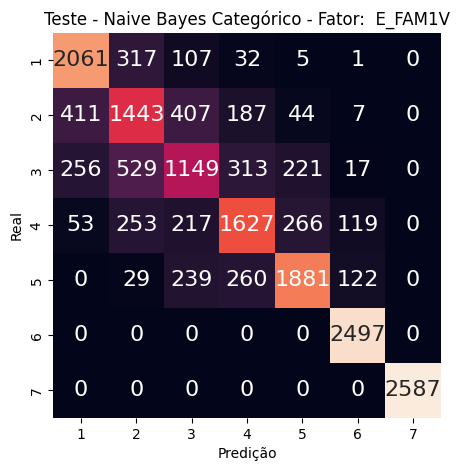

DECISION TREE - E_FAM2V
Acurácia: 0.988539873	 Precisão: 0.988990114	 Recall: 0.988539873	 F1 Score: 0.988512460
[[2219  140   20    0    0    0    0]
 [   4 2368   17    0    0    0    0]
 [   0    8 2359    4    0    0    0]
 [   0    0    0 2436    0    0    0]
 [   0    0    0    0 2445    0    0]
 [   0    0    0    0    0 2422    0]
 [   0    0    0    0    0    0 2399]]


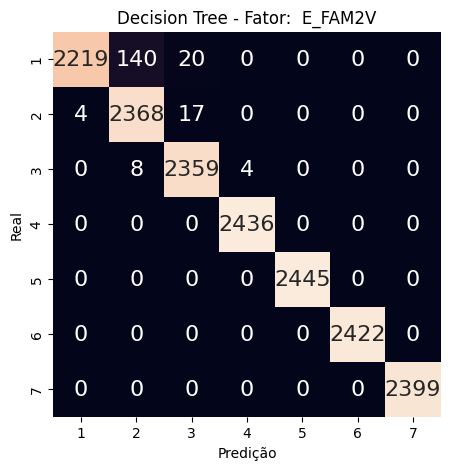

--------------------------

RANDOM FOREST - E_FAM2V
Acurácia: 0.990855650	 Precisão: 0.991095707	 Recall: 0.990855650	 F1 Score: 0.990836153


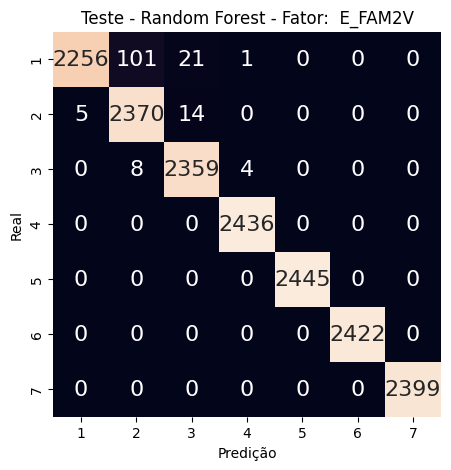

--------------------------

ADABOOST - E_FAM2V
Acurácia: 0.281396592	 Precisão: 0.636934146	 Recall: 0.281396592	 F1 Score: 0.155494301


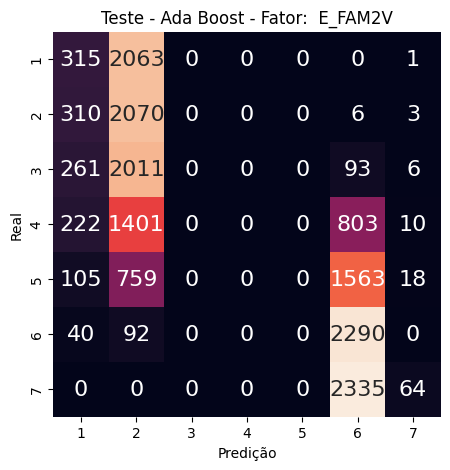

--------------------------

NAIVE BAYES CATEGÓRICO - E_FAM2V
Acurácia: 0.640163886	 Precisão: 0.636322205	 Recall: 0.640163886	 F1 Score: 0.636805646


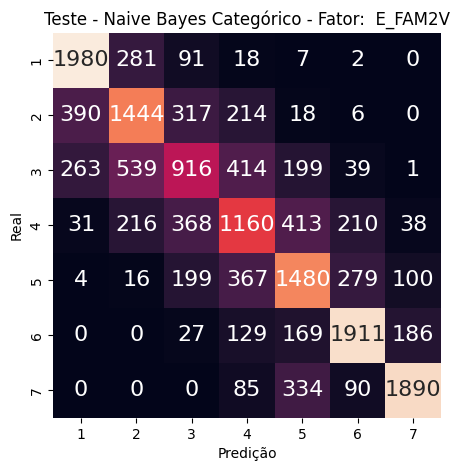

DECISION TREE - E_COM1V
Acurácia: 0.957073377	 Precisão: 0.958085738	 Recall: 0.957073377	 F1 Score: 0.956205580
[[1690  261   45   90    4    9    5]
 [  55 1971   13   21    3    4    1]
 [   0    1 1944    5   10    0    0]
 [   8    3   18 1998    5    4    4]
 [   0    0    0    0 2028    0    0]
 [   0    0    0    0   11 1970   14]
 [   0    0    0    0    0   15 1977]]


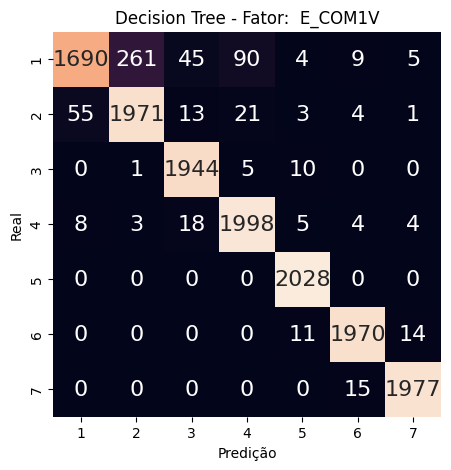

--------------------------

RANDOM FOREST - E_COM1V
Acurácia: 0.968210333	 Precisão: 0.968547724	 Recall: 0.968210333	 F1 Score: 0.967829172


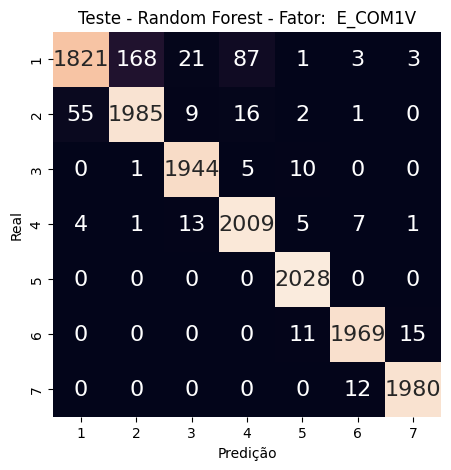

--------------------------

ADABOOST - E_COM1V
Acurácia: 0.416367097	 Precisão: 0.409562625	 Recall: 0.416367097	 F1 Score: 0.397870672


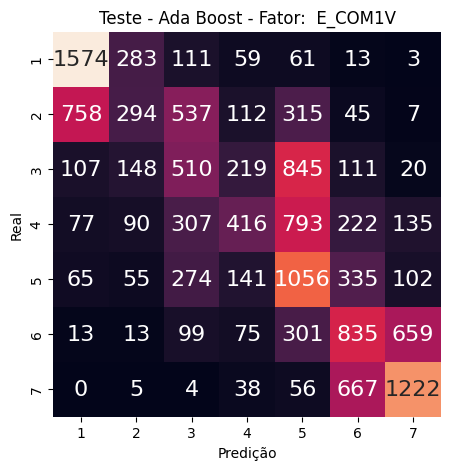

--------------------------

NAIVE BAYES CATEGÓRICO - E_COM1V
Acurácia: 0.529216889	 Precisão: 0.528650634	 Recall: 0.529216889	 F1 Score: 0.522478593


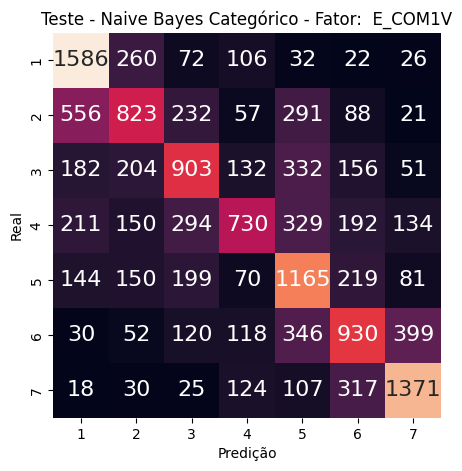

DECISION TREE - E_COM2V
Acurácia: 0.977282629	 Precisão: 0.978631022	 Recall: 0.977282629	 F1 Score: 0.976942412
[[1973  251   55   14    8    0    0]
 [  18 2314    1    3    0    0    0]
 [   1    5 2244    3    3    0    0]
 [   0    0    0 2289    3    0    0]
 [   0    0    0    0 2308    0    0]
 [   0    0    0    0    0 2227    0]
 [   0    0    0    0    0    0 2347]]


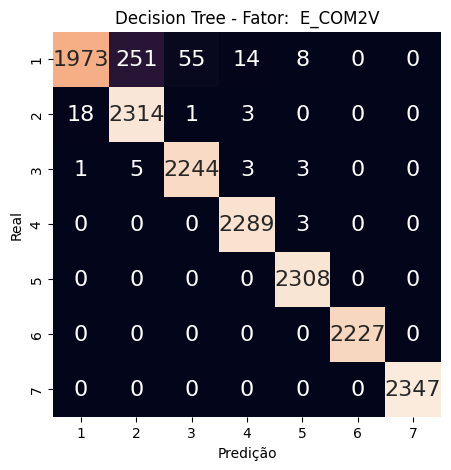

--------------------------

RANDOM FOREST - E_COM2V
Acurácia: 0.982635215	 Precisão: 0.983218686	 Recall: 0.982635215	 F1 Score: 0.982435642


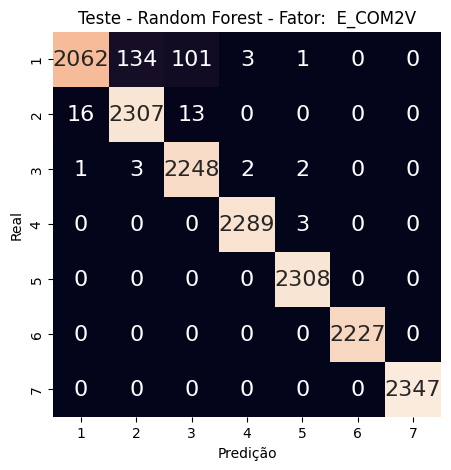

--------------------------

ADABOOST - E_COM2V
Acurácia: 0.333478559	 Precisão: 0.368666728	 Recall: 0.333478559	 F1 Score: 0.319560681


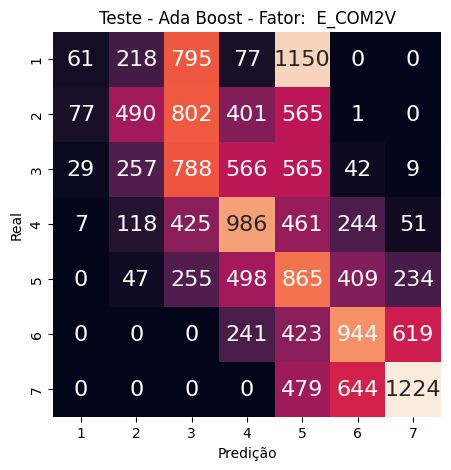

--------------------------

NAIVE BAYES CATEGÓRICO - E_COM2V
Acurácia: 0.519138607	 Precisão: 0.513238162	 Recall: 0.519138607	 F1 Score: 0.513408647


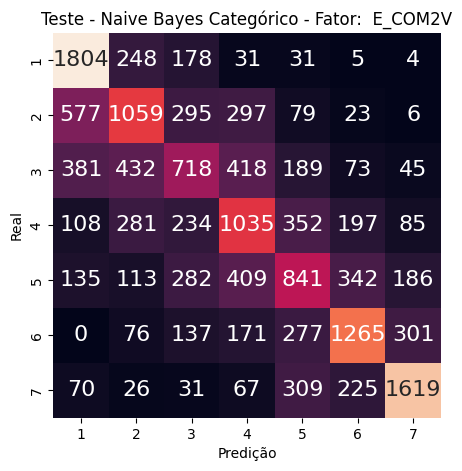

DECISION TREE - E_COM3V
Acurácia: 0.988506982	 Precisão: 0.989023192	 Recall: 0.988506982	 F1 Score: 0.988421136
[[2427  170   19   18    1    0    0]
 [   5 2687    0    1    0    0    0]
 [   0    0 2672    0    0    0    0]
 [   0    0    0 2632    0    0    0]
 [   0    0    0    0 2656    0    0]
 [   0    0    0    0    0 2711    0]
 [   0    0    0    0    0    0 2621]]


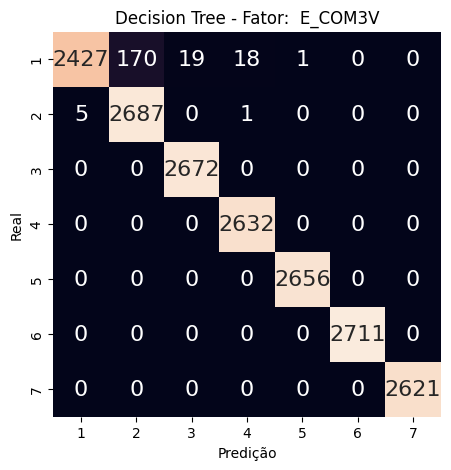

--------------------------

RANDOM FOREST - E_COM3V
Acurácia: 0.992910849	 Precisão: 0.993159647	 Recall: 0.992910849	 F1 Score: 0.992893850


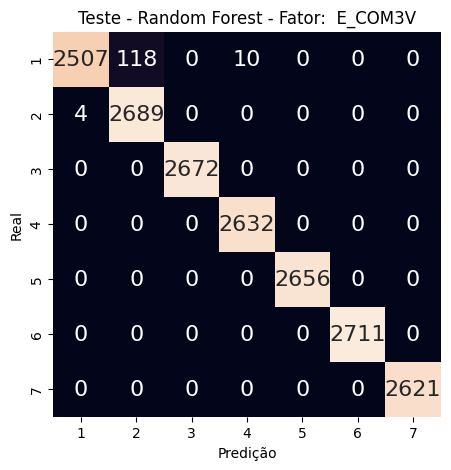

--------------------------

ADABOOST - E_COM3V
Acurácia: 0.449838883	 Precisão: 0.520024864	 Recall: 0.449838883	 F1 Score: 0.454163910


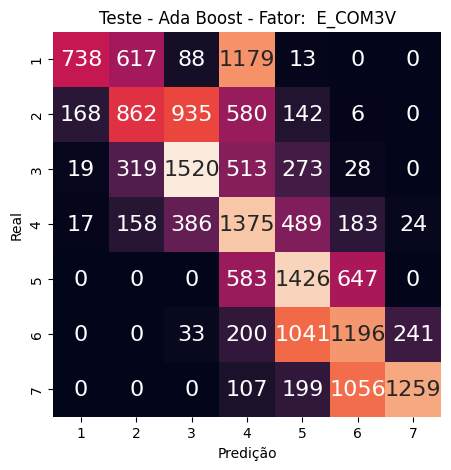

--------------------------

NAIVE BAYES CATEGÓRICO - E_COM3V
Acurácia: 0.629699248	 Precisão: 0.636854980	 Recall: 0.629699248	 F1 Score: 0.630850677


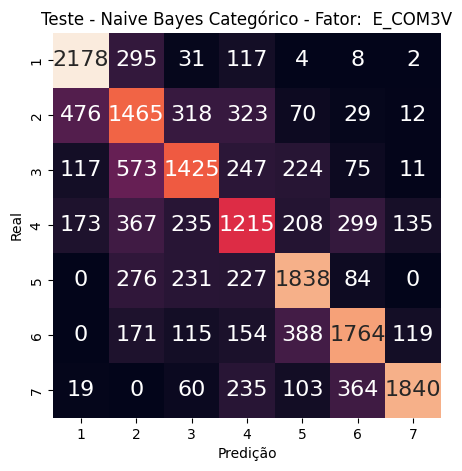

DECISION TREE - E_EST1V
Acurácia: 0.987947572	 Precisão: 0.988248921	 Recall: 0.987947572	 F1 Score: 0.987787534
[[2618  108   49   55    4    3   10]
 [   0 2809    9    0    0    0    0]
 [   0    2 2854    0    0    0    0]
 [   0    0    0 2866    0    0    0]
 [   0    0    0    0 2839    0    0]
 [   0    0    0    0    0 2830    0]
 [   0    0    0    0    0    0 2857]]


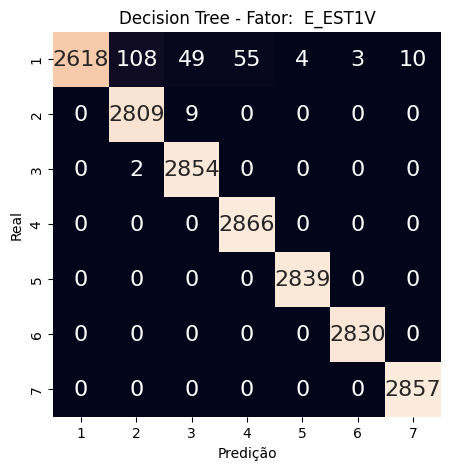

--------------------------

RANDOM FOREST - E_EST1V
Acurácia: 0.996836238	 Precisão: 0.996854884	 Recall: 0.996836238	 F1 Score: 0.996829868


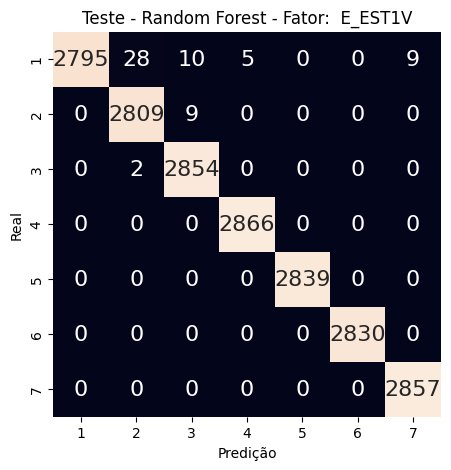

--------------------------

ADABOOST - E_EST1V
Acurácia: 0.465022849	 Precisão: 0.458395635	 Recall: 0.465022849	 F1 Score: 0.454569975


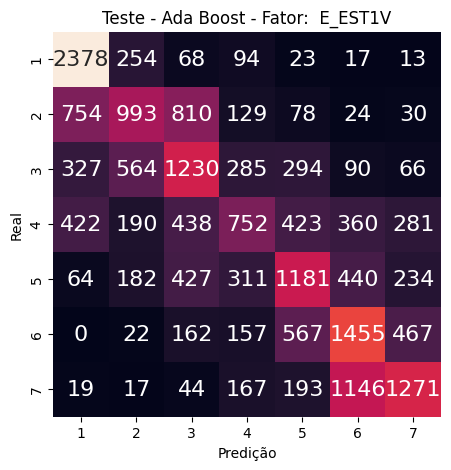

--------------------------

NAIVE BAYES CATEGÓRICO - E_EST1V
Acurácia: 0.567317833	 Precisão: 0.568723238	 Recall: 0.567317833	 F1 Score: 0.563402589


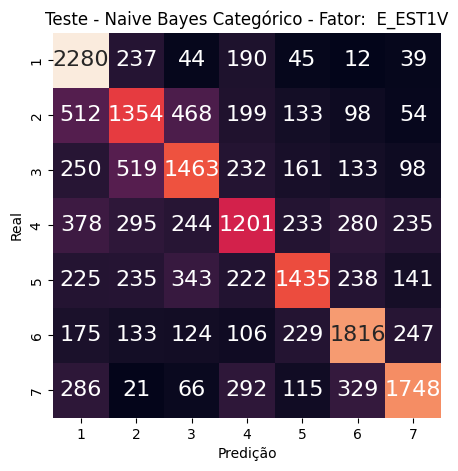

DECISION TREE - E_EST2V
Acurácia: 0.973289665	 Precisão: 0.974189465	 Recall: 0.973289665	 F1 Score: 0.973112790
[[1703  166   15   49    1    0    0]
 [  23 1936    4   10    0    4    0]
 [   0    0 1964    0    0    0    0]
 [   9   42    8 1938    9   18    2]
 [   0    0    0    0 1883    0    0]
 [   0    0    0    0    7 1935    0]
 [   0    0    0    0    0    0 2014]]


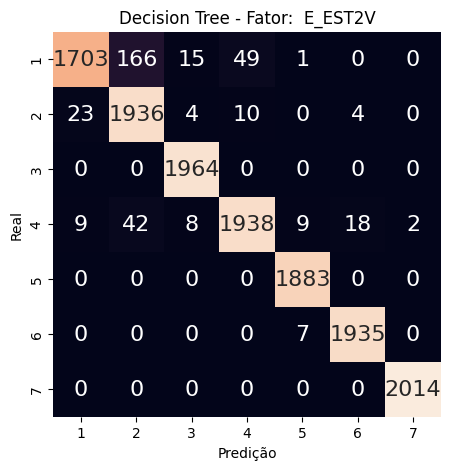

--------------------------

RANDOM FOREST - E_EST2V
Acurácia: 0.981295488	 Precisão: 0.981635502	 Recall: 0.981295488	 F1 Score: 0.981176100


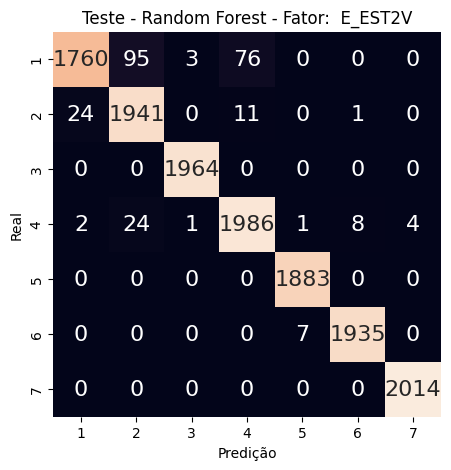

--------------------------

ADABOOST - E_EST2V
Acurácia: 0.381586608	 Precisão: 0.425480643	 Recall: 0.381586608	 F1 Score: 0.382408663


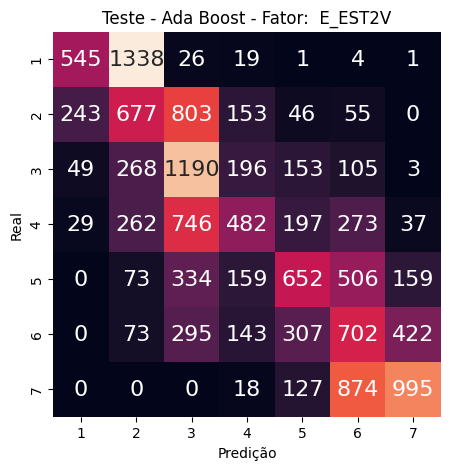

--------------------------

NAIVE BAYES CATEGÓRICO - E_EST2V
Acurácia: 0.482168850	 Precisão: 0.482410913	 Recall: 0.482168850	 F1 Score: 0.474973736


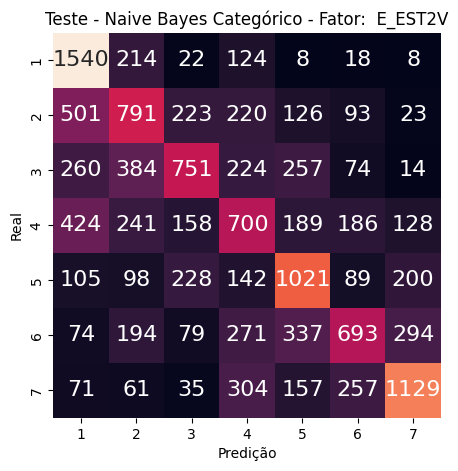

DECISION TREE - E_EST3V
Acurácia: 0.986756179	 Precisão: 0.987237780	 Recall: 0.986756179	 F1 Score: 0.986687563
[[2165  143   38    0    0    0    0]
 [   6 2313    9    6    0    0    0]
 [   1    6 2372    8    0    0    0]
 [   0    0    0 2333    0    0    0]
 [   0    0    0    0 2360    0    0]
 [   0    0    0    0    0 2266    0]
 [   0    0    0    0    0    0 2359]]


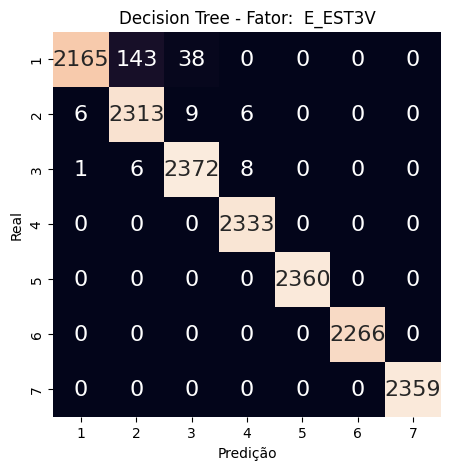

--------------------------

RANDOM FOREST - E_EST3V
Acurácia: 0.987244431	 Precisão: 0.987795643	 Recall: 0.987244431	 F1 Score: 0.987156619


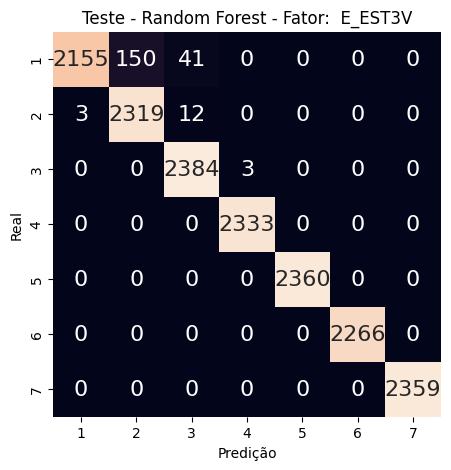

--------------------------

ADABOOST - E_EST3V
Acurácia: 0.318156851	 Precisão: 0.338854607	 Recall: 0.318156851	 F1 Score: 0.273703286


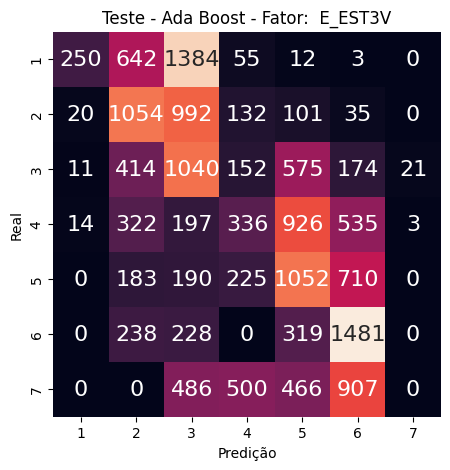

--------------------------

NAIVE BAYES CATEGÓRICO - E_EST3V
Acurácia: 0.758010375	 Precisão: 0.761468350	 Recall: 0.758010375	 F1 Score: 0.758019485


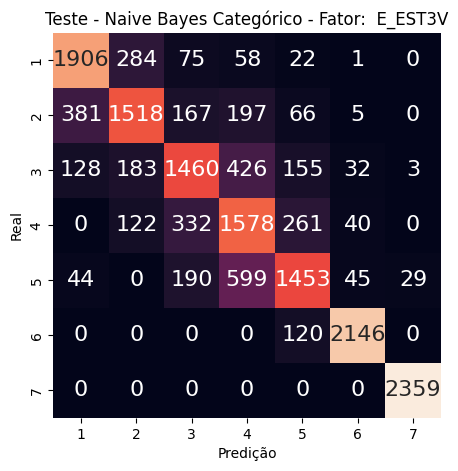

In [219]:
variaveis_fatores = [
    'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V', 'E_FAM2V', 'E_COM1V',
    'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V', 'E_EST3V'
]

variaveis_fatores_aux = [
    'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V', 'E_FAM2V', 'E_COM1V',
    'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V', 'E_EST3V'
]

for d in variaveis_fatores_aux:
    get_confusion_fatores(d)

In [250]:
def get_confusion_dimensoes_knn(string_de_var):
        df_copy = td_para_modelo.copy()
        variaveis_dimensoes.remove(string_de_var)
        df_copy.drop(columns=variaveis_dimensoes, inplace=True)
        df_copy.drop(columns=variaveis_fatores, inplace=True)
        df_copy = df_copy.loc[df_copy[string_de_var] != 0]
        df_copy_balanco_duplicando = df_copy.copy()

        maior_numero = df_copy_balanco_duplicando[string_de_var].value_counts().max()

        df_pra_7 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 7].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[7.0], replace=True)
        df_pra_6 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 6].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[6.0], replace=True)
        df_pra_5 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 5].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[5.0], replace=True)
        df_pra_4 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 4].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[4.0], replace=True)
        df_pra_3 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 3].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[3.0], replace=True)
        df_pra_2 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 2].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[2.0], replace=True)

        df_copy_balanco_duplicando = pd.concat([df_pra_7, df_pra_6, df_pra_5, df_pra_4, df_pra_3, df_pra_2, df_copy_balanco_duplicando], ignore_index=True)

        df_copy_balanco_duplicando.groupby(string_de_var).count()

        X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns=string_de_var), df_copy_balanco_duplicando[string_de_var], test_size=0.2)
        model = KNeighborsClassifier()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        variaveis_dimensoes.insert(0,string_de_var)

        print("K VIZINHOS PRÓXIMOS - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        print(confusion)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='K Vizinhos Próximos - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")

In [236]:
def get_confusion_dimensoes_knn_less_6(string_de_var):
        df_copy = td_para_modelo.copy()
        variaveis_dimensoes.remove(string_de_var)
        df_copy.drop(columns=variaveis_dimensoes, inplace=True)
        df_copy.drop(columns=variaveis_fatores, inplace=True)
        df_copy = df_copy.loc[df_copy[string_de_var] != 0]
        df_copy_balanco_duplicando = df_copy.copy()

        maior_numero = df_copy_balanco_duplicando[string_de_var].value_counts().max()

        # df_pra_7 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 7].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[7.0], replace=True)
        df_pra_6 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 6].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[6.0], replace=True)
        df_pra_5 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 5].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[5.0], replace=True)
        df_pra_4 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 4].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[4.0], replace=True)
        df_pra_3 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 3].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[3.0], replace=True)
        df_pra_2 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 2].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[2.0], replace=True)

        df_copy_balanco_duplicando = pd.concat([df_pra_6, df_pra_5, df_pra_4, df_pra_3, df_pra_2, df_copy_balanco_duplicando], ignore_index=True)

        df_copy_balanco_duplicando.groupby(string_de_var).count()

        X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns=string_de_var), df_copy_balanco_duplicando[string_de_var], test_size=0.2)
        model = KNeighborsClassifier()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        variaveis_dimensoes.insert(0,string_de_var)

        print("K VIZINHOS PRÓXIMOS - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        print(confusion)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                yticklabels=['1', '2', '3', '4', '5', '6'], xticklabels=['1', '2', '3', '4', '5', '6'], ax=ax1)
        ax1.set(title='K Vizinhos Próximos - Dimensão:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

In [242]:
def get_confusion_fatores_knn(string_de_var):
        df_copy = td_para_modelo.copy()
        variaveis_fatores.remove(string_de_var)
        df_copy.drop(columns=variaveis_dimensoes, inplace=True)
        df_copy.drop(columns=variaveis_fatores, inplace=True)
        df_copy = df_copy.loc[df_copy[string_de_var] != 0]
        df_copy_balanco_duplicando = df_copy.copy()

        maior_numero = df_copy_balanco_duplicando[string_de_var].value_counts().max()

        df_pra_7 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 7].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[7.0], replace=True)
        df_pra_6 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 6].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[6.0], replace=True)
        df_pra_5 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 5].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[5.0], replace=True)
        df_pra_4 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 4].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[4.0], replace=True)
        df_pra_3 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 3].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[3.0], replace=True)
        df_pra_2 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 2].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[2.0], replace=True)

        df_copy_balanco_duplicando = pd.concat([df_pra_7, df_pra_6, df_pra_5, df_pra_4, df_pra_3, df_pra_2, df_copy_balanco_duplicando], ignore_index=True)

        df_copy_balanco_duplicando.groupby(string_de_var).count()

        X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns=string_de_var), df_copy_balanco_duplicando[string_de_var], test_size=0.2)
        model = KNeighborsClassifier()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
        confusion = confusion_matrix(y_test, y_pred)

        variaveis_dimensoes.insert(0,string_de_var)

        print("K VIZINHOS PRÓXIMOS - " + string_de_var)
        print("Acurácia: {:.9f}".format(accuracy)
                + "\t Precisão: {:.9f}".format(precision)
                + "\t Recall: {:.9f}".format(recall)
                + "\t F1 Score: {:.9f}".format(f1))

        print(confusion)

        f, (ax1) = plt.subplots(1, figsize=(5,5))
        sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
                yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
        ax1.set(title='K Vizinhos Próximos - Fator:  ' + string_de_var, xlabel='Predição', ylabel='Real')
        plt.show()

        print("--------------------------\n")


K VIZINHOS PRÓXIMOS - E_ESC1V
Acurácia: 0.742289692	 Precisão: 0.740910883	 Recall: 0.742289692	 F1 Score: 0.737724470
[[1233  397  172  354   45   80   78]
 [ 200 1509  255  184   59  107   68]
 [  59  203 1835   69   80  103   31]
 [ 144  276  173 1452   68  139   83]
 [   0   56   92    0 2117   77   28]
 [   9   27  136   56   85 2006  120]
 [   0    0    0   29   59   94 2219]]


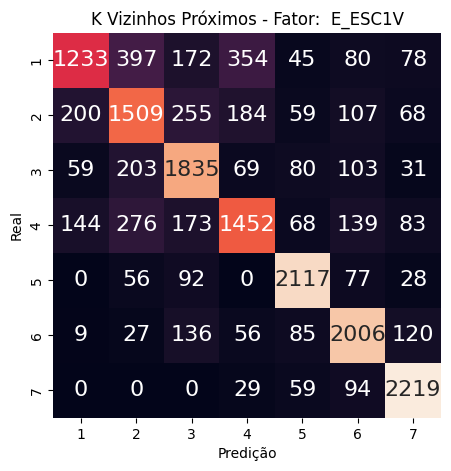

--------------------------

K VIZINHOS PRÓXIMOS - E_ESC2V
Acurácia: 0.666536479	 Precisão: 0.660486864	 Recall: 0.666536479	 F1 Score: 0.660315920
[[ 881  376  279  113  127   41   17]
 [ 250 1040  176  173  105   65   25]
 [ 190  285  839  222  173   57   42]
 [  44  204  158 1193  123   82   33]
 [  29   57  131  191 1247  133   57]
 [   0    0    0   50    0 1668  102]
 [   0    0    0    0    0  159 1665]]


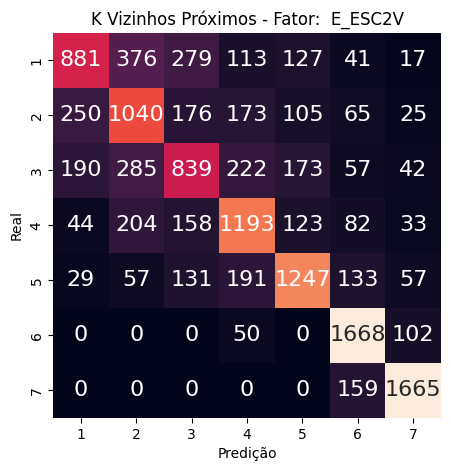

--------------------------

K VIZINHOS PRÓXIMOS - E_PROF1V
Acurácia: 0.785573555	 Precisão: 0.790021952	 Recall: 0.785573555	 F1 Score: 0.782115192
[[1455  469  357  176  143   34   24]
 [ 127 1883  294  171  108   36   25]
 [ 115  268 1772  190  152   50   20]
 [   4  106  142 2118  121   34   40]
 [  25   50  125  203 2078  121    0]
 [   0    0    0   49    0 2515    0]
 [   0    0    0    0    0  139 2533]]


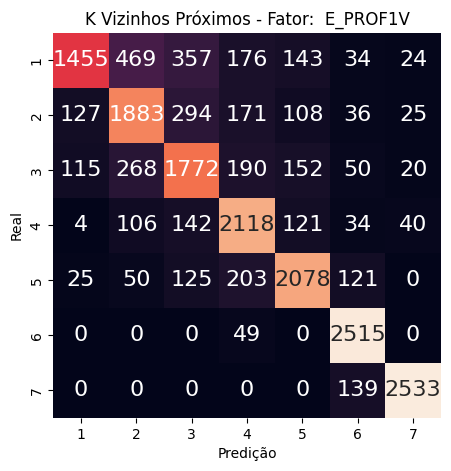

--------------------------

K VIZINHOS PRÓXIMOS - E_PROF2V
Acurácia: 0.749655026	 Precisão: 0.757937584	 Recall: 0.749655026	 F1 Score: 0.747544018
[[1523  244  164  253  117   69  284]
 [  17 1975  310   97   96   91   72]
 [  36  255 2109   60  138   75   54]
 [  24  143  141 1949  145  127  125]
 [  34   70   94   93 2247  196   34]
 [  16   35   45   64   47 2416   56]
 [  42  142  116  248  152   96 1906]]


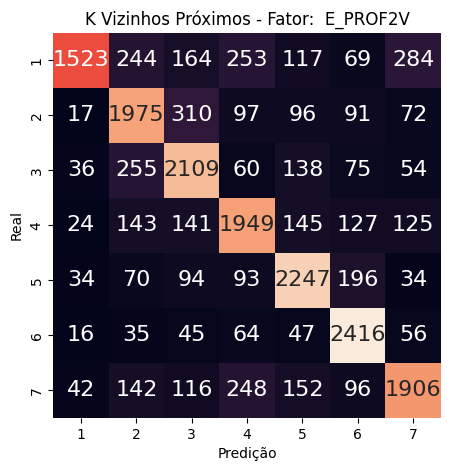

--------------------------

K VIZINHOS PRÓXIMOS - E_FAM1V
Acurácia: 0.841989013	 Precisão: 0.839724686	 Recall: 0.841989013	 F1 Score: 0.839231689
[[1592  484  364   64   32    3    5]
 [ 233 1781  250  143   63   12    9]
 [ 199  329 1716  128   45    7    5]
 [  11   31   96 2193  120   99    0]
 [   0    0    0   35 2515   23    0]
 [   0    0    0    0    0 2559    0]
 [   0    0    0    0    0    0 2511]]


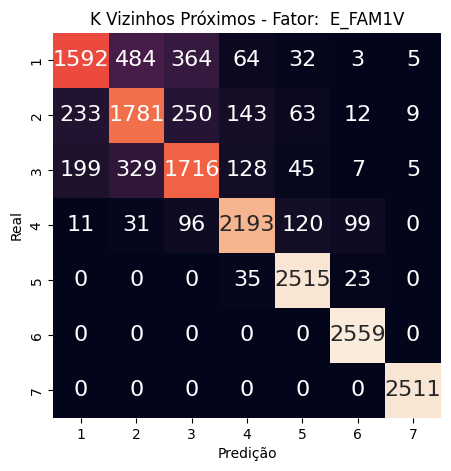

--------------------------

K VIZINHOS PRÓXIMOS - E_FAM2V
Acurácia: 0.734576332	 Precisão: 0.736068762	 Recall: 0.734576332	 F1 Score: 0.731472431
[[1253  416  304  176  140   51   37]
 [ 167 1621  258  192  108   56   39]
 [ 152  273 1512  230  164   60   48]
 [  54  143  191 1660  187   47   42]
 [  29  112   53  168 1859  113   56]
 [   0    0    0   94   31 2306    0]
 [   0    0   49   79   41  110 2160]]


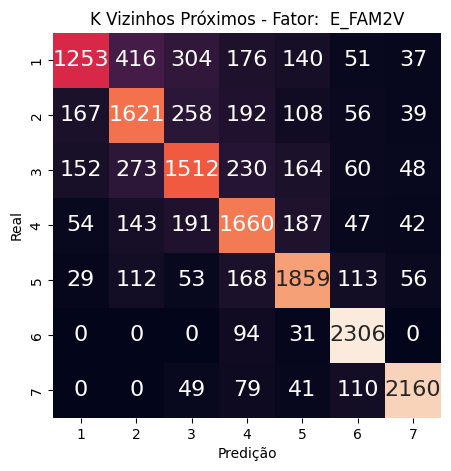

--------------------------

K VIZINHOS PRÓXIMOS - E_COM1V
Acurácia: 0.652075844	 Precisão: 0.652540182	 Recall: 0.652075844	 F1 Score: 0.649568168
[[1058  285  194  271   74  111  107]
 [ 157 1195  221  133  101  122   67]
 [  69  196 1331  128   75  164   40]
 [ 184  204  169 1070   88  139  151]
 [  10   56  119   39 1690  105   16]
 [  17   28  171  160  138 1362  136]
 [  56   19   56  116   56  188 1545]]


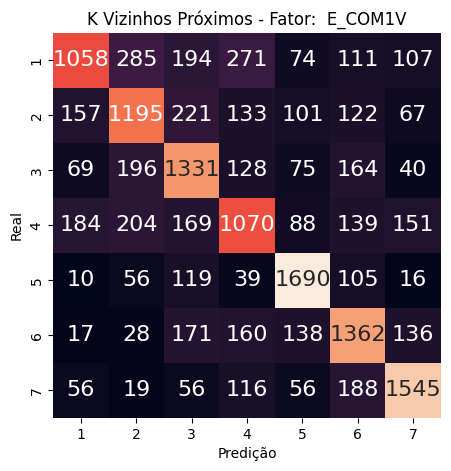

--------------------------

K VIZINHOS PRÓXIMOS - E_COM2V
Acurácia: 0.716686376	 Precisão: 0.716540340	 Recall: 0.716686376	 F1 Score: 0.712667529
[[1198  360  323  154  123   39   45]
 [ 144 1477  240  195  163   43   31]
 [ 160  284 1253  207  213   68   61]
 [  46  175  173 1654  170   79   77]
 [  13   68   75  136 1861   64  108]
 [   0   25    0   88   76 2104   71]
 [   0    0    0   31   59  165 1968]]


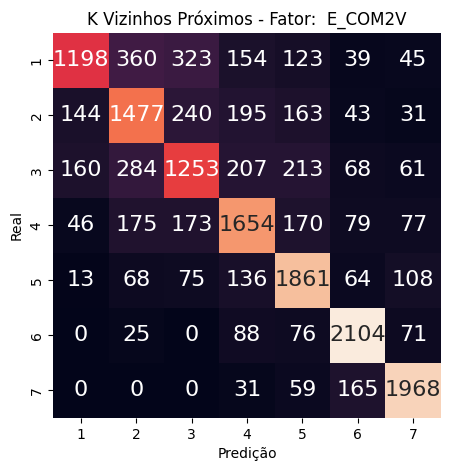

--------------------------

K VIZINHOS PRÓXIMOS - E_COM3V
Acurácia: 0.804296455	 Precisão: 0.805046405	 Recall: 0.804296455	 F1 Score: 0.800538307
[[1629  468  167  289   36   49   65]
 [ 191 1867  270  227   45   61   64]
 [  32  105 2314   49   64   66   32]
 [  89  192  207 1898   91  108   96]
 [   0    0    0    0 2519  131    0]
 [   0   55   93    0   86 2400    0]
 [   0   22   37   25   45   87 2349]]


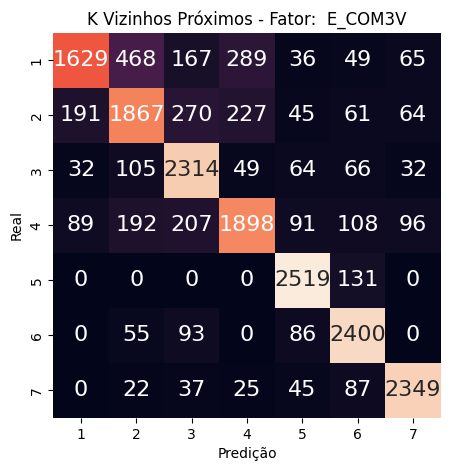

--------------------------

K VIZINHOS PRÓXIMOS - E_EST1V
Acurácia: 0.774569377	 Precisão: 0.782217841	 Recall: 0.774569377	 F1 Score: 0.772245486
[[1662  294  178  269   81   65  278]
 [  45 2007  313  144  132   70   79]
 [  27  264 2149   89  200   72   58]
 [  19  120  115 2271  119  106  109]
 [  38   58   43   70 2375  212   61]
 [   0    0    0   58  175 2548   60]
 [  13   57   60  125   93  120 2412]]


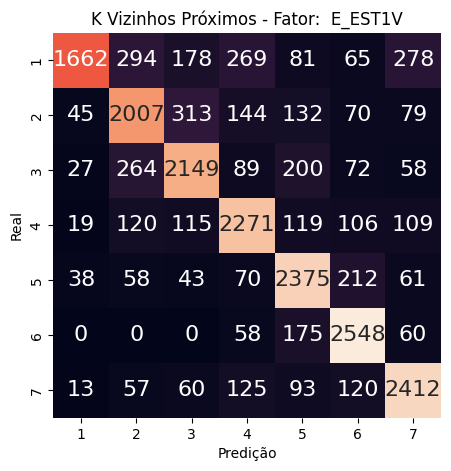

--------------------------

K VIZINHOS PRÓXIMOS - E_EST2V
Acurácia: 0.679184862	 Precisão: 0.674932518	 Recall: 0.679184862	 F1 Score: 0.672756158
[[ 980  295  151  303   76  113   86]
 [ 158 1178  198  161   99  109   91]
 [  25  115 1556   41  125   40   15]
 [ 210  207  155  933   93  155  160]
 [   0   43   67   53 1680   70   59]
 [  34   45   85   72  138 1447  145]
 [  13   76   28  102   79  118 1558]]


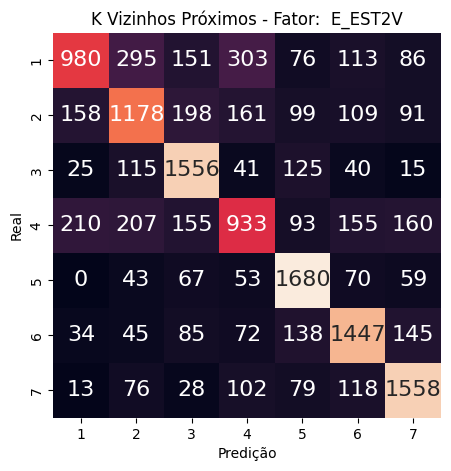

--------------------------

K VIZINHOS PRÓXIMOS - E_EST3V
Acurácia: 0.802807446	 Precisão: 0.801495596	 Recall: 0.802807446	 F1 Score: 0.800699248
[[1412  441  399   72   42    9    1]
 [ 263 1598  276  114   43    2    1]
 [ 251  266 1550  153  100   21    6]
 [  29   32   58 1948  199   13    0]
 [   0   25    0  244 1995   24   25]
 [   0    0    0    0  122 2260    0]
 [   0    0    0    0    0    0 2391]]


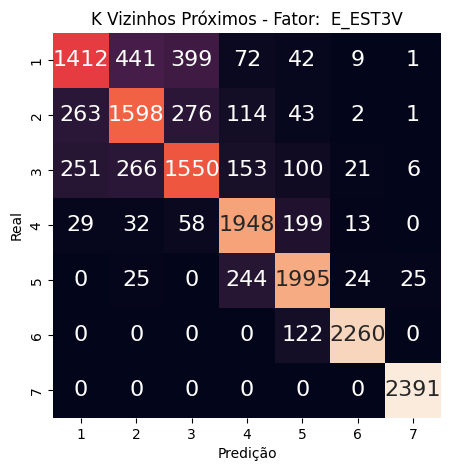

--------------------------



In [243]:
variaveis_fatores = [
    'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V', 'E_FAM2V', 'E_COM1V',
    'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V', 'E_EST3V'
]

variaveis_fatores_aux = [
    'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V', 'E_FAM2V', 'E_COM1V',
    'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V', 'E_EST3V'
]

variaveis_dimensoes = [
    'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
]

variaveis_dimensoes_aux = [
    'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
]

for d in variaveis_fatores_aux:
    get_confusion_fatores_knn(d)

# get_confusion_dimensoes_knn_less_6('E_ESTV')

In [16]:
variaveis_dimensoes = ['E_ESCV', 'E_PROFV', 'E_COMV', 'E_ESTV', 'E_FAMV']
string_de_var = 'E_ESTV'

df_copy = td_para_modelo.copy()
variaveis_dimensoes.remove(string_de_var)
df_copy.drop(columns=variaveis_dimensoes, inplace=True)
df_copy.drop(columns=variaveis_fatores, inplace=True)
df_copy = df_copy.loc[df_copy[string_de_var] != 0]
df_copy_balanco_duplicando = df_copy.copy()

maior_numero = df_copy_balanco_duplicando[string_de_var].value_counts().max()

# df_pra_7 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 7].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[7.0], replace=True)
df_pra_6 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 6].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[6.0], replace=True)
df_pra_5 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 5].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[5.0], replace=True)
df_pra_4 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 4].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[4.0], replace=True)
df_pra_3 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 3].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[3.0], replace=True)
df_pra_2 = df_copy_balanco_duplicando.loc[df_copy_balanco_duplicando[string_de_var] == 2].sample(maior_numero - df_copy_balanco_duplicando[string_de_var].value_counts()[2.0], replace=True)

df_copy_balanco_duplicando = pd.concat([df_pra_6, df_pra_5, df_pra_4, df_pra_3, df_pra_2, df_copy_balanco_duplicando], ignore_index=True)

df_copy_balanco_duplicando.groupby(string_de_var).count()

X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns=string_de_var), df_copy_balanco_duplicando[string_de_var], test_size=0.2)
model = RandomForestClassifier(class_weight='balanced')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
confusion = confusion_matrix(y_test, y_pred)

variaveis_dimensoes.insert(0,string_de_var)

print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))

# print(confusion)

# f, (ax1) = plt.subplots(1, figsize=(10,10))
# sns.heatmap(confusion, annot=True, annot_kws={"size": 16}, fmt="d", cbar=False,
#             yticklabels=['1', '2', '3', '4', '5', '6', '7'], xticklabels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)
# ax1.set(title='Teste')
# plt.show()

Acurácia: 0.743256835	 Precisão: 0.734811932	 Recall: 0.743256835	 F1 Score: 0.734105712


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns='E_COMV'), df_copy_balanco_duplicando['E_COMV'], test_size=0.2)
model = RandomForestClassifier(class_weight='balanced')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
confusion = confusion_matrix(y_test, y_pred)

print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))

confusion_matrix(y_test, y_pred)

Acurácia: 0.780434443	 Precisão: 0.773394279	 Recall: 0.780434443	 F1 Score: 0.773518832


array([[1074,  384,  199,  114,   40,    7,    1],
       [ 334,  961,  252,  197,   69,   15,    5],
       [  63,  188, 1228,  285,  103,   27,    7],
       [   8,   28,   56, 1548,  119,   43,   15],
       [   0,    0,    0,   17, 1713,   52,   38],
       [   0,    0,    0,    0,    0, 1688,  144],
       [   0,    0,    0,    0,    0,    0, 1776]], dtype=int64)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(columns='E_ESCV'), df_copy['E_ESCV'], test_size=0.2)
model = AdaBoostClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
confusion = confusion_matrix(y_test, y_pred)

print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))

confusion_matrix(y_test, y_pred)

Acurácia: 0.506440281	 Precisão: 0.457151059	 Recall: 0.506440281	 F1 Score: 0.438478342


array([[1409,  294,    8,    0,    0,    0,    2],
       [ 804,  317,    3,    1,    0,    0,    1],
       [ 237,   97,    2,    1,    0,    0,    0],
       [ 134,   59,    2,    2,    0,    0,    0],
       [  17,   10,    0,    0,    0,    0,    0],
       [   8,    2,    0,    0,    0,    0,    0],
       [   6,    0,    0,    0,    0,    0,    0]], dtype=int64)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(columns='E_ESCV'), df_copy['E_ESCV'], test_size=0.2)
model = GradientBoostingClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
confusion = confusion_matrix(y_test, y_pred)

print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))

confusion_matrix(y_test, y_pred)

Acurácia: 0.540105386	 Precisão: 0.504398770	 Recall: 0.540105386	 F1 Score: 0.468844947


array([[1497,  193,    0,    0,    2,    0,    2],
       [ 740,  324,    9,    0,    1,    0,    0],
       [ 221,  127,   23,    2,    0,    0,    0],
       [ 141,   73,    6,    1,    2,    0,    0],
       [  17,   17,    1,    1,    0,    0,    1],
       [   6,    5,    0,    0,    0,    0,    0],
       [   3,    1,    0,    0,    0,    0,    0]], dtype=int64)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns='E_ESCV'), df_copy_balanco_duplicando['E_ESCV'], test_size=0.2)
model = GradientBoostingClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
confusion = confusion_matrix(y_test, y_pred)

print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))

confusion_matrix(y_test, y_pred)

Acurácia: 0.518741633	 Precisão: 0.486509941	 Recall: 0.518741633	 F1 Score: 0.493665804


array([[ 784,  355,  157,  160,  121,   94,   60],
       [ 374,  446,  261,  248,  191,  165,   43],
       [ 240,  250,  498,  238,  243,  211,   36],
       [ 209,  172,  220,  428,  271,  293,   61],
       [  88,   95,  112,  155,  854,  270,  132],
       [   0,    0,    0,    0,   34, 1419,  193],
       [   0,    0,    0,    0,    0,    0, 1771]], dtype=int64)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(df_copy_balanco_duplicando.drop(columns='E_ESCV'), df_copy_balanco_duplicando['E_ESCV'], test_size=0.2)
model = KNeighborsClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
confusion = confusion_matrix(y_test, y_pred)

print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))

confusion_matrix(y_test, y_pred)

Acurácia: 0.705321285	 Precisão: 0.695650439	 Recall: 0.705321285	 F1 Score: 0.699253095


array([[ 934,  340,  175,  141,   48,   20,   10],
       [ 387,  724,  274,  197,   70,   31,    9],
       [ 154,  285,  949,  171,  113,   42,   10],
       [  43,  138,  199, 1136,   99,   74,    8],
       [   0,   23,   14,   50, 1498,   71,   75],
       [   0,    0,    0,    0,   95, 1559,   48],
       [   0,    0,    0,    0,    0,  108, 1630]], dtype=int64)

In [17]:
# GAUSSIAN NAIVE BAYES

for v in variaveis:
    X_train, X_test, y_train, y_test = train_test_split(td_para_modelo, td_para_modelo[v], test_size=0.2)

    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calcular os valores diretamente
    tn = sum((y_test == 0) & (y_pred == 0))
    fp = sum((y_test == 0) & (y_pred == 1))
    fn = sum((y_test == 1) & (y_pred == 0))
    tp = sum((y_test == 1) & (y_pred == 1))

    print(v)
    print("Verdadeiros Negativos (TN):", tn)
    print("Falsos Positivos (FP):", fp)
    print("Falsos Negativos (FN):", fn)
    print("Verdadeiros Positivos (TP):", tp)
    print("\n")

    confusion_matrix_test = confusion_matrix(y_test, y_pred)

    print(confusion_matrix_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
    confusion = confusion_matrix(y_test, y_pred)

    print("Variável: {}".format(v))

    print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))
    
    print("------------------\n")

E_ESCV
Verdadeiros Negativos (TN): 3
Falsos Positivos (FP): 1
Falsos Negativos (FN): 20
Verdadeiros Positivos (TP): 1682


[[   3    1    0    0    0    0    0    0]
 [  20 1682    0    0    0    0    0    0]
 [  12 1074    0    0    0    0    0    0]
 [  10  363    0    0    0    0    0    0]
 [   2  193    0    0    0    0    0    0]
 [   1   40    0    0    0    0    0    0]
 [   1   17    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0]]
------------------

E_PROFV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 66
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 2391


[[   0   66    0    0    0    0    0    0]
 [   0 2391    0    0    0    0    0    0]
 [   0  522    0    0    0    0    0    0]
 [   0  135    0    0    0    0    0    0]
 [   0  202    0    0    0    0    0    0]
 [   0   72    0    0    0    0    0    0]
 [   0   28    0    0    0    0    0    0]
 [   0    6    0    0    0    0    0    0]]
------------------

E_FAMV
Verdadeiros Nega

In [12]:
confusion_matrix_test = confusion_matrix(y_test, y_pred)

print(confusion_matrix_test)

[[   0    6    0    0    0    0    0    0]
 [   0 2327    0    0    0    0    0    0]
 [   0  524    0    0    0    0    0    0]
 [   0  482    0    0    0    0    0    0]
 [   0   58    0    0    0    0    0    0]
 [   0   21    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0]]


In [488]:
# DECISION TREE

for v in variaveis:
    X_train, X_test, y_train, y_test = train_test_split(td_para_modelo, td_para_modelo[v], test_size=0.2)

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calcular os valores diretamente
    tn = sum((y_test == 0) & (y_pred == 0))
    fp = sum((y_test == 0) & (y_pred == 1))
    fn = sum((y_test == 1) & (y_pred == 0))
    tp = sum((y_test == 1) & (y_pred == 1))

    print(v)
    print("Verdadeiros Negativos (TN):", tn)
    print("Falsos Positivos (FP):", fp)
    print("Falsos Negativos (FN):", fn)
    print("Verdadeiros Positivos (TP):", tp)
    print("\n")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
    confusion = confusion_matrix(y_test, y_pred)

    print("Variável: {}".format(v))

    print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))
    
    print("------------------\n")

E_ESCV
Verdadeiros Negativos (TN): 2
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 2603


Variável: E_ESCV
Acurácia: 1.000000000	 Precisão: 1.000000000	 Recall: 1.000000000	 F1 Score: 1.000000000
------------------

E_PROFV
Verdadeiros Negativos (TN): 119
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 3556


Variável: E_PROFV
Acurácia: 1.000000000	 Precisão: 1.000000000	 Recall: 1.000000000	 F1 Score: 1.000000000
------------------

E_FAMV
Verdadeiros Negativos (TN): 8
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 3283


Variável: E_FAMV
Acurácia: 1.000000000	 Precisão: 1.000000000	 Recall: 1.000000000	 F1 Score: 1.000000000
------------------

E_COMV
Verdadeiros Negativos (TN): 8
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 2723


Variável: E_COMV
Acurácia: 1.000000000	 Precisão: 1.000000000	 Recall: 1.000000000	 F1 Score: 1.000000000
------------------

E_ES

In [489]:
# KNN

for v in variaveis:
    X_train, X_test, y_train, y_test = train_test_split(td_para_modelo, td_para_modelo[v], test_size=0.3)

    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calcular os valores diretamente
    tn = sum((y_test == 0) & (y_pred == 0))
    fp = sum((y_test == 0) & (y_pred == 1))
    fn = sum((y_test == 1) & (y_pred == 0))
    tp = sum((y_test == 1) & (y_pred == 1))

    print(v)
    print("Verdadeiros Negativos (TN):", tn)
    print("Falsos Positivos (FP):", fp)
    print("Falsos Negativos (FN):", fn)
    print("Verdadeiros Positivos (TP):", tp)
    print("\n")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
    confusion = confusion_matrix(y_test, y_pred)

    print("Variável: {}".format(v))

    print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))
    
    print("------------------\n")

E_ESCV
Verdadeiros Negativos (TN): 10
Falsos Positivos (FP): 1
Falsos Negativos (FN): 4
Verdadeiros Positivos (TP): 1998


Variável: E_ESCV
Acurácia: 0.548607052	 Precisão: 0.506085334	 Recall: 0.548607052	 F1 Score: 0.516110255
------------------

E_PROFV
Verdadeiros Negativos (TN): 106
Falsos Positivos (FP): 22
Falsos Negativos (FN): 8
Verdadeiros Positivos (TP): 3266


Variável: E_PROFV
Acurácia: 0.705045782	 Precisão: 0.641191591	 Recall: 0.705045782	 F1 Score: 0.659099452
------------------

E_FAMV
Verdadeiros Negativos (TN): 7
Falsos Positivos (FP): 2
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 2809


Variável: E_FAMV
Acurácia: 0.657899864	 Precisão: 0.619519462	 Recall: 0.657899864	 F1 Score: 0.629041482
------------------

E_COMV
Verdadeiros Negativos (TN): 2
Falsos Positivos (FP): 2
Falsos Negativos (FN): 3
Verdadeiros Positivos (TP): 2192


Variável: E_COMV
Acurácia: 0.576466004	 Precisão: 0.539838869	 Recall: 0.576466004	 F1 Score: 0.546045343
------------------

E_

In [490]:
# Máquinas de Vetores de Suporte (SVM)

for v in variaveis:
    X_train, X_test, y_train, y_test = train_test_split(td_para_modelo, td_para_modelo[v], test_size=0.2)

    model = SVC()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calcular os valores diretamente
    tn = sum((y_test == 0) & (y_pred == 0))
    fp = sum((y_test == 0) & (y_pred == 1))
    fn = sum((y_test == 1) & (y_pred == 0))
    tp = sum((y_test == 1) & (y_pred == 1))

    print(v)
    print("Verdadeiros Negativos (TN):", tn)
    print("Falsos Positivos (FP):", fp)
    print("Falsos Negativos (FN):", fn)
    print("Verdadeiros Positivos (TP):", tp)
    print("\n")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
    confusion = confusion_matrix(y_test, y_pred)

    print("Variável: {}".format(v))

    print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))
    
    print("------------------\n")

E_ESCV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 3
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 1702


Variável: E_ESCV
Acurácia: 0.497369959	 Precisão: 0.750006917	 Recall: 0.497369959	 F1 Score: 0.330415172
------------------

E_PROFV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 74
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 2383


Variável: E_PROFV
Acurácia: 0.696376388	 Precisão: 0.788563686	 Recall: 0.696376388	 F1 Score: 0.571736411
------------------

E_FAMV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 7
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 2217


Variável: E_FAMV
Acurácia: 0.647866745	 Precisão: 0.771864574	 Recall: 0.647866745	 F1 Score: 0.509423860
------------------

E_COMV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 8
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 1800


Variável: E_COMV
Acurácia: 0.526008182	 Precisão: 0.750676426	 Recall: 0.526008182	 F1 Score: 0.362625327
------------------

E_EST

In [491]:
# REGRESSÃO LOGÍSTICA

for v in variaveis:
    X_train, X_test, y_train, y_test = train_test_split(td_para_modelo, td_para_modelo[v], test_size=0.2)

    # Escala dos dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Aumente o número de iterações
    model = LogisticRegression(max_iter=1000)

    model.fit(X_train_scaled, y_train)

    # Calcular os valores diretamente
    tn = sum((y_test == 0) & (y_pred == 0))
    fp = sum((y_test == 0) & (y_pred == 1))
    fn = sum((y_test == 1) & (y_pred == 0))
    tp = sum((y_test == 1) & (y_pred == 1))

    print(v)
    print("Verdadeiros Negativos (TN):", tn)
    print("Falsos Positivos (FP):", fp)
    print("Falsos Negativos (FN):", fn)
    print("Verdadeiros Positivos (TP):", tp)
    print("\n")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
    confusion = confusion_matrix(y_test, y_pred)

    print("Variável: {}".format(v))

    print("Acurácia: {:.9f}".format(accuracy)
          + "\t Precisão: {:.9f}".format(precision)
          + "\t Recall: {:.9f}".format(recall)
          + "\t F1 Score: {:.9f}".format(f1))
    
    print("------------------\n")

E_ESCV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 5
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 1710


Variável: E_ESCV
Acurácia: 0.499707773	 Precisão: 0.750000085	 Recall: 0.499707773	 F1 Score: 0.333008688
------------------

E_PROFV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 90
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 2367


Variável: E_PROFV
Acurácia: 0.691700760	 Precisão: 0.786749181	 Recall: 0.691700760	 F1 Score: 0.565643703
------------------

E_FAMV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 10
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 2173


Variável: E_FAMV
Acurácia: 0.635008767	 Precisão: 0.768227367	 Recall: 0.635008767	 F1 Score: 0.493252565
------------------

E_COMV
Verdadeiros Negativos (TN): 0
Falsos Positivos (FP): 7
Falsos Negativos (FN): 0
Verdadeiros Positivos (TP): 1792


Variável: E_COMV
Acurácia: 0.523670368	 Precisão: 0.750560286	 Recall: 0.523670368	 F1 Score: 0.359960606
------------------

E_ES

In [492]:
# Itere sobre as variáveis alvo
for v in variaveis:
    print("Variável:", v)

    X_train, X_test, y_train, y_test = train_test_split(td_para_modelo, td_para_modelo[v], test_size=0.2)

    # Treinamento com XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    y_pred_xgb = xgb_model.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
    f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
    recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)

    # Treinamento com LightGBM
    lgbm_model = LGBMClassifier(verbose=-1)
    lgbm_model.fit(X_train, y_train)

    y_pred_lgbm = lgbm_model.predict(X_test)
    accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
    precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted', zero_division=1)
    f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')
    recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted', zero_division=1)

    print("XGBoost - Accuracy: {:.6f}".format(accuracy_xgb)
          + "\t Precision: {:.6f}".format(precision_xgb)
          + "\t Recall Score: {:.6f}".format(recall_xgb)
          + "\t F1 Score: {:.6f}".format(f1_xgb))

    print("LightGBM - Accuracy: {:.6f}".format(accuracy_lgbm)
          + "\t Precision: {:.6f}".format(precision_lgbm)
          + "\t Recall Score: {:.6f}".format(recall_lgbm)
          + "\t F1 Score: {:.6f}".format(f1_lgbm))

Variável: E_ESCV
XGBoost - Accuracy: 1.000000	 Precision: 1.000000	 Recall Score: 1.000000	 F1 Score: 1.000000
LightGBM - Accuracy: 0.545587	 Precision: 0.705220	 Recall Score: 0.545587	 F1 Score: 0.428200
Variável: E_PROFV
XGBoost - Accuracy: 1.000000	 Precision: 1.000000	 Recall Score: 1.000000	 F1 Score: 1.000000
LightGBM - Accuracy: 1.000000	 Precision: 1.000000	 Recall Score: 1.000000	 F1 Score: 1.000000
Variável: E_FAMV
XGBoost - Accuracy: 1.000000	 Precision: 1.000000	 Recall Score: 1.000000	 F1 Score: 1.000000
LightGBM - Accuracy: 0.866452	 Precision: 0.884983	 Recall Score: 0.866452	 F1 Score: 0.868993
Variável: E_COMV
XGBoost - Accuracy: 1.000000	 Precision: 1.000000	 Recall Score: 1.000000	 F1 Score: 1.000000
LightGBM - Accuracy: 1.000000	 Precision: 1.000000	 Recall Score: 1.000000	 F1 Score: 1.000000
Variável: E_ESTV
XGBoost - Accuracy: 1.000000	 Precision: 1.000000	 Recall Score: 1.000000	 F1 Score: 1.000000
LightGBM - Accuracy: 1.000000	 Precision: 1.000000	 Recall Score

# Filé Mignon

segundo isabela

[ ] trabalhos relacionados

[ ] traçar correlação

[ ] entender como as variáveis se relacionam (maiúsculas e minúsculas)

[ ] uma criança com tais características em uma escola de tais características pode estar sendo associada com tais fatores e tais dimensões 

[ ] tabelas de correlação

In [119]:
dimensoes_v = ['E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV']
fatores_v = ["E_ESC1V","E_ESC2V","E_PROF1V","E_PROF2V","E_FAM1V","E_FAM2V","E_COM1V","E_COM2V","E_COM3V","E_EST1V","E_EST2V","E_EST3V"]

variaveis = [
    'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
    'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V', 'E_FAM2V', 'E_COM1V',
    'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V', 'E_EST3V'
]

drop = ['nome_aluno', 'id', 'telefone', 'created_date',	'updated_date', 'id_escola.1', 'nome_escola', 'endereco', 'latitude', 'longitude', 'E_ESCC', 'E_PROFC', 'E_FAMC', 'E_COMC', 'E_ESTC', "E_ESC1C","E_ESC2C","E_PROF1C","E_PROF2C","E_FAM1C","E_FAM2C","E_COM1C","E_COM2C","E_COM3C","E_EST1C","E_EST2C","E_EST3C"]

df_file = td_dimensoes_fatores.copy()
df_file.drop(columns=drop, inplace=True)

# def round_to_interval(value):
#     return np.clip(np.round(value), 0, 7)

# for coluna in variaveis:
#     df_file.loc[:, coluna] = df_file[coluna].apply(round_to_interval).astype(int)

df_file.groupby('ano_turma').count()

id_aluno  E_ESCV  E_PROFV  E_FAMV  E_COMV  E_ESTV  id_raca_etnia  \
ano_turma                                                                     
1°               59      59       59      59      59      59             59   
2°               18      18       18      18      18      18             18   
3°               23      23       23      23      23      23             23   
4°                9       9        9       9       9       9              9   
5°               61      61       61      61      61      61             61   
6°             4912    4912     4912    4912    4912    4912           4912   
7°             4418    4418     4418    4418    4418    4418           4418   
8°             4103    4103     4103    4103    4103    4103           4103   
9°             3506    3506     3506    3506    3506    3506           3506   

           id_renda_familiar  sexo  id_turma  ...  E_PROF1V  E_PROF2V  \
ano_turma                                     ...                       
1°                        59    59        59  ...        59        59   
2°                        18    18        18  ...        18        18   
3°                        23    23        23  ...        23        23   
4°                         9     9         9  ...         9         9   
5°                        61    61        61  ...        61        61   
6°                      4912  4912      4912  ...      4912      4912   
7°                      4418  4418      4418  ...      4418      4418   
8°                      4103  4103      4103  ...      4103      4103   
9°                      3506  3506      3506  ...      3506      3506   

           E_FAM1V  E_FAM2V  E_COM1V  E_COM2V  E_COM3V  E_EST1V  E_EST2V  \
ano_turma                                                                  
1°              59       59       59       59       59       59       59   
2°              18       18       18       18       18       18       18   
3°              23       23       23       23       23       23       23   
4°               9        9        9        9        9        9        9   
5°              61       61       61       61       61       61       61   
6°            4912     4912     4912     4912     4912     4912     4912   
7°            4418     4418     4418     4418     4418     4418     4418   
8°            4103     4103     4103     4103     4103     4103     4103   
9°            3506     3506     3506     3506     3506     3506     3506   

           E_EST3V  
ano_turma           
1°              59  
2°              18  
3°              23  
4°               9  
5°              61  
6°            4912  
7°            4418  
8°            4103  
9°            3506  

[9 rows x 42 columns]

In [116]:
df_file.columns

Index(['id_aluno', 'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
       'id_raca_etnia', 'id_renda_familiar', 'sexo', 'id_turma', 'id_escola',
       'etnia', 'renda', 'nome_turma', 'modo_ensino', 'etapa_ensino',
       'ano_turma', 'restricao_de_atendimento', 'localidade_diferenciada',
       'categoria_administrativa', 'dependencia_administrativa',
       'categoria_escola', 'conveniada_poder_publico',
       'regulamentacao_pelo_conselho', 'porte_da_escola', 'modalidade_ensino',
       'outras_ofertas_educacionais', 'uf', 'municipio', 'localizacao',
       'data_criacao', 'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V',
       'E_FAM2V', 'E_COM1V', 'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V',
       'E_EST3V'],
      dtype='object')

In [117]:
df_etnia = df_file.copy()
var = df_etnia[['etnia', 'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV']]

lista_etnia = var.groupby('etnia').count().E_ESCV.values.tolist()

for e in range (0, len(lista_etnia)):
    lista_etnia[e] = lista_etnia[e] / 17110

lista_etnia

[0.009818819403857393,
 0.14278199883109294,
 0.01694915254237288,
 0.7276446522501461,
 0.10274693161893629]

In [98]:
df_etnia = df_file.copy()
var = df_etnia[['etnia', 'E_ESCV']]

lista_etnia = var.groupby('etnia').count().E_ESCV.values.tolist()


E_ESC1V   E_ESC2V  E_PROF1V  E_PROF2V   E_FAM1V   E_FAM2V  \
E_ESC1V   1.000000  0.129909  0.252585  0.130589 -0.124185  0.311035   
E_ESC2V   0.129909  1.000000  0.095712  0.038800 -0.061965  0.165735   
E_PROF1V  0.252585  0.095712  1.000000  0.198440 -0.156156  0.297082   
E_PROF2V  0.130589  0.038800  0.198440  1.000000 -0.237843  0.191239   
E_FAM1V  -0.124185 -0.061965 -0.156156 -0.237843  1.000000 -0.208410   
E_FAM2V   0.311035  0.165735  0.297082  0.191239 -0.208410  1.000000   
E_COM1V   0.095248  0.369555  0.088257  0.043564 -0.088682  0.130586   
E_COM2V   0.254224  0.107709  0.330401  0.248124 -0.205865  0.347920   
E_COM3V   0.150166  0.150577  0.109767  0.012869 -0.131289  0.381672   
E_EST1V   0.231943  0.086869  0.326013  0.198441 -0.117390  0.262096   
E_EST2V   0.276131  0.122002  0.241040  0.117680 -0.100536  0.315884   
E_EST3V  -0.011991 -0.003754 -0.059274 -0.018618  0.074333 -0.051895   

           E_COM1V   E_COM2V   E_COM3V   E_EST1V   E_EST2V   E_EST3V  
E_ESC1V   0.095248  0.254224  0.150166  0.231943  0.276131 -0.011991  
E_ESC2V   0.369555  0.107709  0.150577  0.086869  0.122002 -0.003754  
E_PROF1V  0.088257  0.330401  0.109767  0.326013  0.241040 -0.059274  
E_PROF2V  0.043564  0.248124  0.012869  0.198441  0.117680 -0.018618  
E_FAM1V  -0.088682 -0.205865 -0.131289 -0.117390 -0.100536  0.074333  
E_FAM2V   0.130586  0.347920  0.381672  0.262096  0.315884 -0.051895  
E_COM1V   1.000000  0.105190  0.111115  0.090623  0.079225 -0.199001  
E_COM2V   0.105190  1.000000  0.206872  0.284491  0.236405 -0.060451  
E_COM3V   0.111115  0.206872  1.000000  0.078222  0.178138 -0.036718  
E_EST1V   0.090623  0.284491  0.078222  1.000000  0.216673 -0.043556  
E_EST2V   0.079225  0.236405  0.178138  0.216673  1.000000 -0.020739  
E_EST3V  -0.199001 -0.060451 -0.036718 -0.043556 -0.020739  1.000000

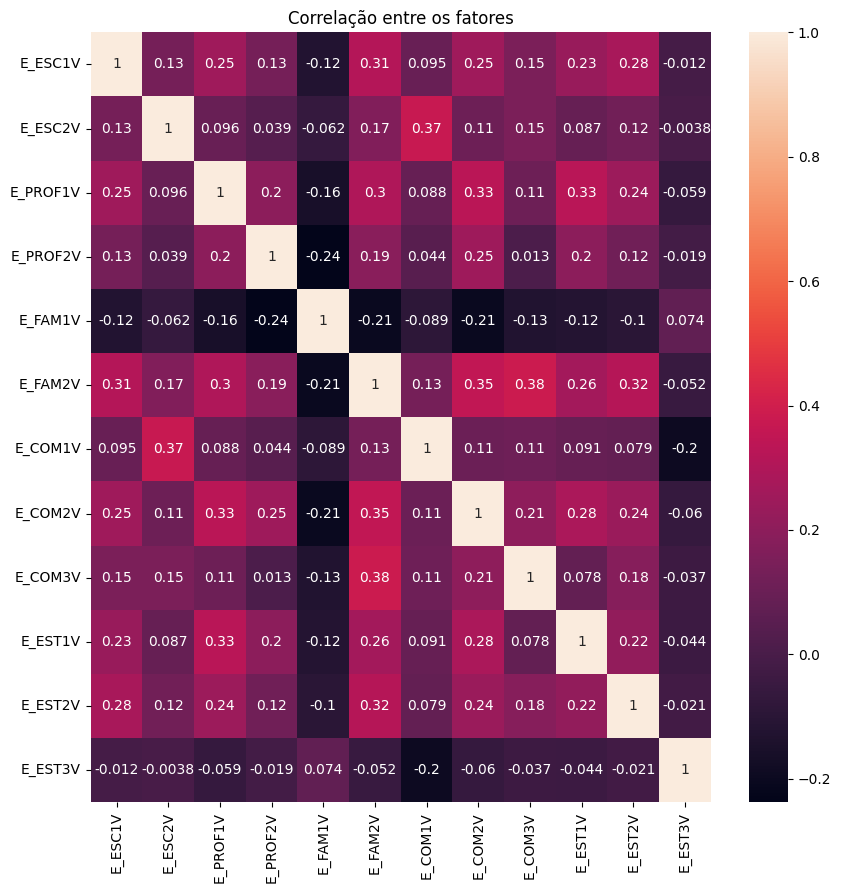

In [166]:
var = df_etnia[["E_ESC1V","E_ESC2V","E_PROF1V","E_PROF2V","E_FAM1V","E_FAM2V","E_COM1V","E_COM2V","E_COM3V","E_EST1V","E_EST2V","E_EST3V"]]

table = var.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

plt.figure(figsize=(10,10))
sns.heatmap(table, annot=True)
plt.title('Correlação entre os fatores')

table

Text(0.5, 1.0, 'Correlação entre as dimensões')

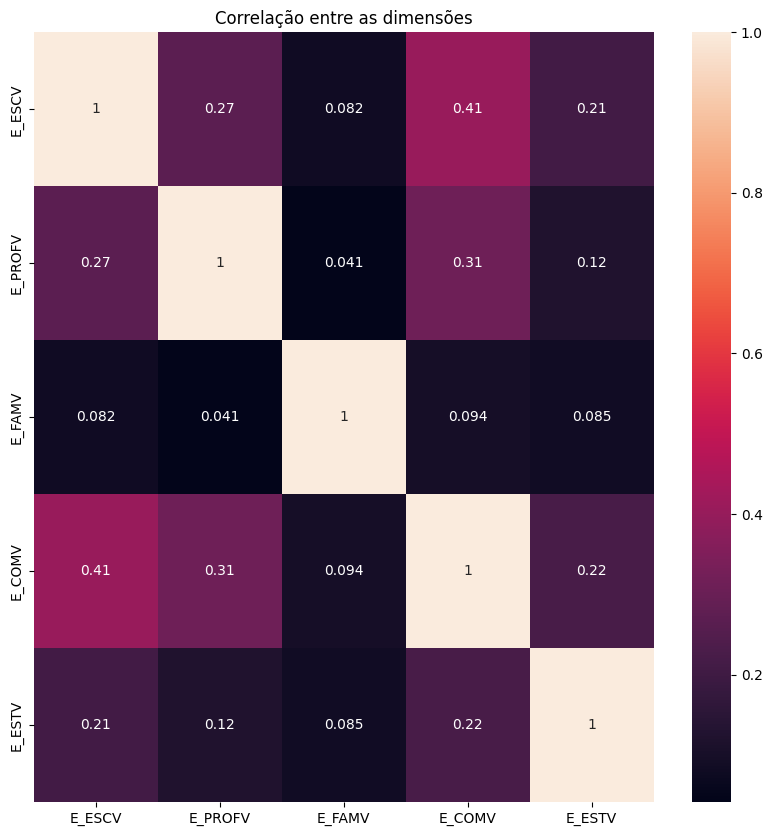

In [123]:
var = df_etnia[['E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV']]

table = var.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

plt.figure(figsize=(10,10))
sns.heatmap(table, annot=True)
plt.title('Correlação entre as dimensões')

In [ ]:
df_etnia = df_file.copy()
var = df_etnia[['id_raca_etnia', 'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV']]

lista_etnia = var.groupby('id_raca_etnia').count().E_ESCV.values.tolist()

for e in range (0, len(lista_etnia)):
    lista_etnia[e] = lista_etnia[e] / 17110

lista_etnia
var.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

                            OLS Regression Results                            
Dep. Variable:          id_raca_etnia   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4598
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.498
Time:                        13:57:29   Log-Likelihood:                -16244.
No. Observations:               17109   AIC:                         3.249e+04
Df Residuals:                   17107   BIC:                         3.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0976      0.010    213.245      0.0

Text(0, 0.5, 'Estudantes mulheres (%)')

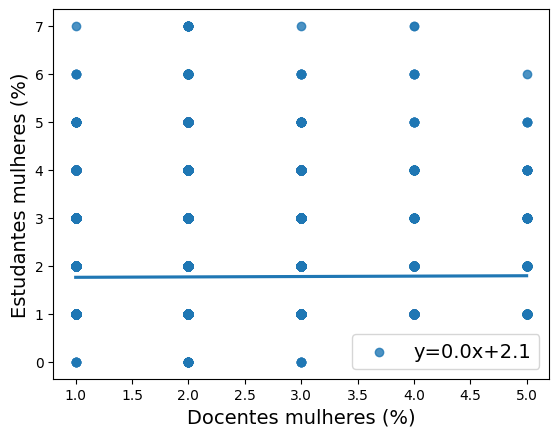

In [85]:
mod1 = smf.ols(formula = 'id_raca_etnia ~ E_ESCV', data = var)
res = mod1.fit()
print(res.summary())
slope, intercept, r_value, pv, se = stats.linregress(var['E_ESCV'],
                                                     var['id_raca_etnia'])
print(r_value, slope, intercept, pv, se)
sns.regplot(x="id_raca_etnia", y="E_ESCV", data=var, 
      ci=None, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best",fontsize=14)
plt.xlabel('Docentes mulheres (%)', fontsize=14)
plt.ylabel('Estudantes mulheres (%)', fontsize=14)
# sns.regplot(x="Feminino_doc", y="Feminino", label="y={0:.1f}x+{1:.1f}".format(slope, intercept),
#             data=relacao_docente_aluno, ci=None)
# plt.show()

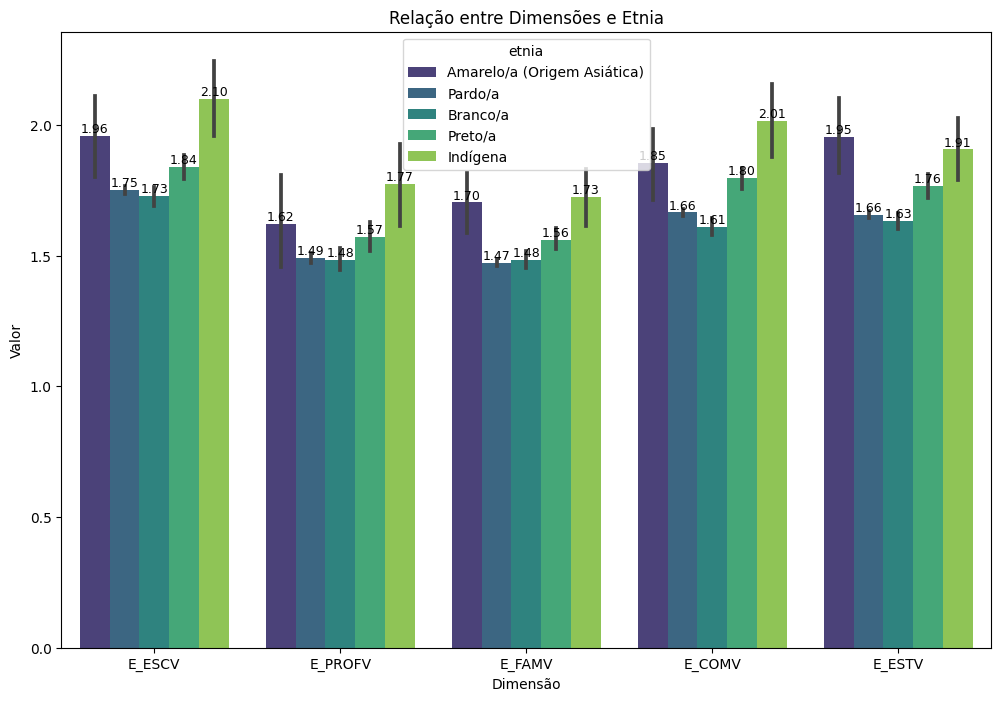

In [35]:
# Selecione as colunas relevantes
df_dimensoes_etnia = df_file[['etnia'] + dimensoes_v]

# Transforme os dados para o formato adequado para o gráfico de barras
df_melted = pd.melt(df_dimensoes_etnia, id_vars=['etnia'], value_vars=dimensoes_v, var_name='Dimensão', value_name='Valor')

# Crie um gráfico de barras usando o seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Dimensão', y='Valor', hue='etnia', data=df_melted, palette='viridis')

# Adicione os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Relação entre Dimensões e Etnia')
plt.xlabel('Dimensão')  
plt.ylabel('Valor')
plt.show()

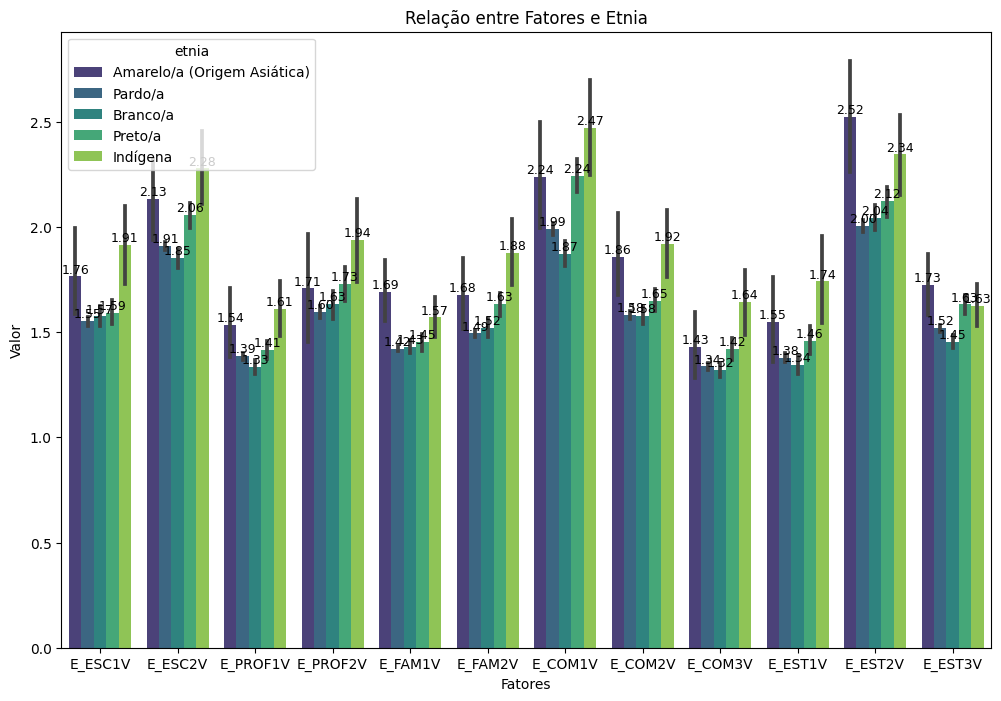

In [39]:
# Selecione as colunas relevantes
df_dimensoes_etnia = df_file[['etnia'] + fatores_v]

# Transforme os dados para o formato adequado para o gráfico de barras
df_melted = pd.melt(df_dimensoes_etnia, id_vars=['etnia'], value_vars=fatores_v, var_name='Fatores', value_name='Valor')

# Crie um gráfico de barras usando o seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Fatores', y='Valor', hue='etnia', data=df_melted, palette='viridis')

# Adicione os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Relação entre Fatores e Etnia')
plt.xlabel('Fatores')
 

  
  
plt.ylabel('Valor')
plt.show()

C:\Users\daniv\AppData\Local\Temp\ipykernel_30832\3429086428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dimensoes_sexo['sexo'] = df_dimensoes_sexo['sexo'].map({1: 'Masculino', 2: 'Feminino'})


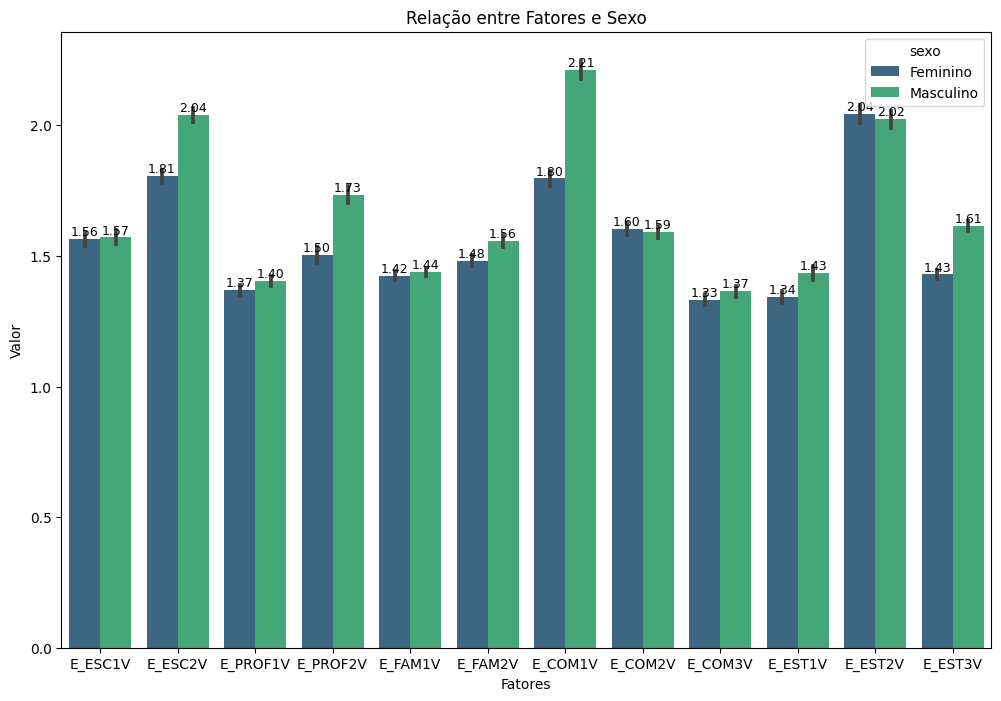

In [42]:
# Selecione as colunas relevantes
df_dimensoes_sexo = df_file[['sexo'] + fatores_v]

# Substitua os valores numéricos por rótulos mais descritivos
df_dimensoes_sexo['sexo'] = df_dimensoes_sexo['sexo'].map({1: 'Masculino', 2: 'Feminino'})

# Transforme os dados para o formato adequado para o gráfico de barras
df_melted = pd.melt(df_dimensoes_sexo, id_vars=['sexo'], value_vars=fatores_v, var_name='Fatores', value_name='Valor')

# Crie um gráfico de barras usando o seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Fatores', y='Valor', hue='sexo', data=df_melted, palette='viridis')

# Adicione os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Relação entre Fatores e Sexo')
plt.xlabel('Fatores')
plt.ylabel('Valor')
plt.show()

C:\Users\daniv\AppData\Local\Temp\ipykernel_30832\3930520310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dimensoes_sexo['sexo'] = df_dimensoes_sexo['sexo'].map({1: 'Masculino', 2: 'Feminino'})


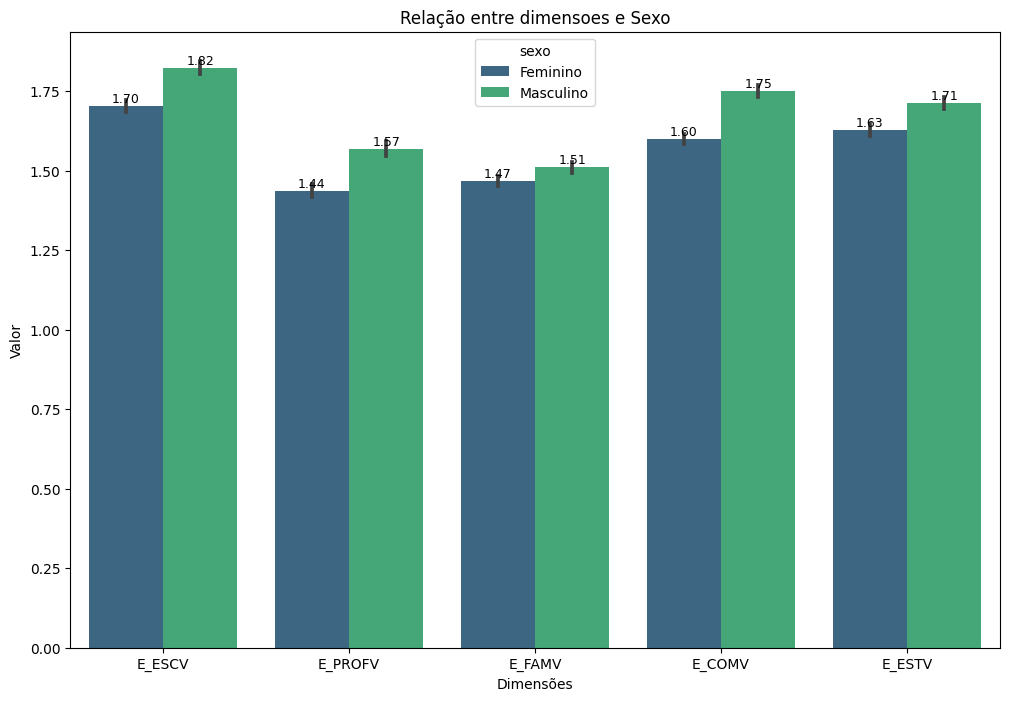

In [43]:
# Selecione as colunas relevantes
df_dimensoes_sexo = df_file[['sexo'] + dimensoes_v]

# Substitua os valores numéricos por rótulos mais descritivos
df_dimensoes_sexo['sexo'] = df_dimensoes_sexo['sexo'].map({1: 'Masculino', 2: 'Feminino'})

# Transforme os dados para o formato adequado para o gráfico de barras
df_melted = pd.melt(df_dimensoes_sexo, id_vars=['sexo'], value_vars=dimensoes_v, var_name='Dimensões', value_name='Valor')

# Crie um gráfico de barras usando o seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Dimensões', y='Valor', hue='sexo', data=df_melted, palette='viridis')

# Adicione os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Relação entre dimensoes e Sexo')
plt.xlabel('Dimensões')
plt.ylabel('Valor')
plt.show()

In [186]:
df_file.groupby('ano_turma').count()

df_anos_iniciais = df_file.loc[df_file['ano_turma'].isin(['1°', '2°', '3°', '4°'])]
df_anos_finais = df_file.loc[df_file['ano_turma'].isin(['5°', '6°', '7°', '8°', '9°'])]


C:\Users\daniv\AppData\Local\Temp\ipykernel_30832\2166866505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dimensoes_etapa['ano_turma'] = df_dimensoes_etapa['ano_turma']


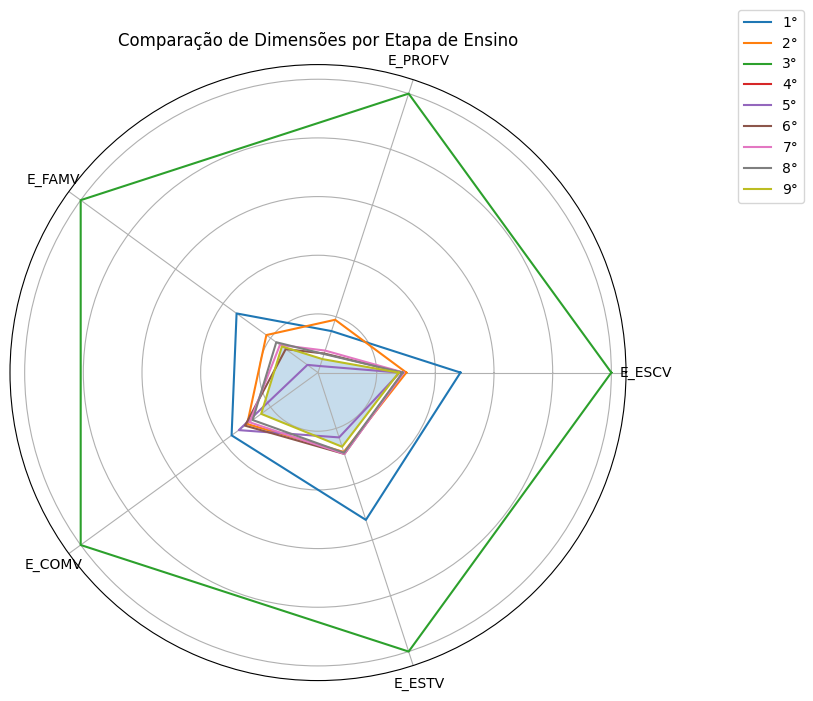

In [200]:
df_dimensoes_etapa = df_file[['ano_turma'] + dimensoes_v]

# Renomear as labels removendo o prefixo
df_dimensoes_etapa['ano_turma'] = df_dimensoes_etapa['ano_turma']

# Agrupar por ano_turma e encontrar a média de cada dimensão
df_grouped = df_dimensoes_etapa.groupby('ano_turma').mean()

# Normalizar os dados (opcional, dependendo dos valores nas dimensões)
df_normalized = (df_grouped - df_grouped.min()) / (df_grouped.max() - df_grouped.min())

# Criar um gráfico de radar
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, polar=True)

# Loop sobre cada etapa_ensino
for etapa in df_normalized.index:
    values = df_normalized.loc[etapa].tolist()
    values += values[:1]  # Adiciona o primeiro valor no final para fechar o círculo
    angles = [n / float(len(dimensoes_v)) * 2 * 3.1415926535 for n in range(len(dimensoes_v))]
    angles += angles[:1]

    plt.plot(angles, values, label=etapa)

    # Adiciona os valores como texto nas pontas do radar
    # for i in range(len(dimensoes_v)):
    #     plt.text(angles[i], values[i], f'{values[i]:.2f}', ha='center', va='center')

# Adiciona as labels dos fatores
ax.set_xticks(angles[:-1])
ax.set_xticklabels(dimensoes_v)

plt.fill(angles, values, alpha=0.25)
plt.title('Comparação de Dimensões por Etapa de Ensino')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_yticklabels([])  # Remove as labels do eixo radial
plt.show()

C:\Users\daniv\AppData\Local\Temp\ipykernel_30832\2689241424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dimensoes_etapa['ano_turma'] = df_dimensoes_etapa['ano_turma']


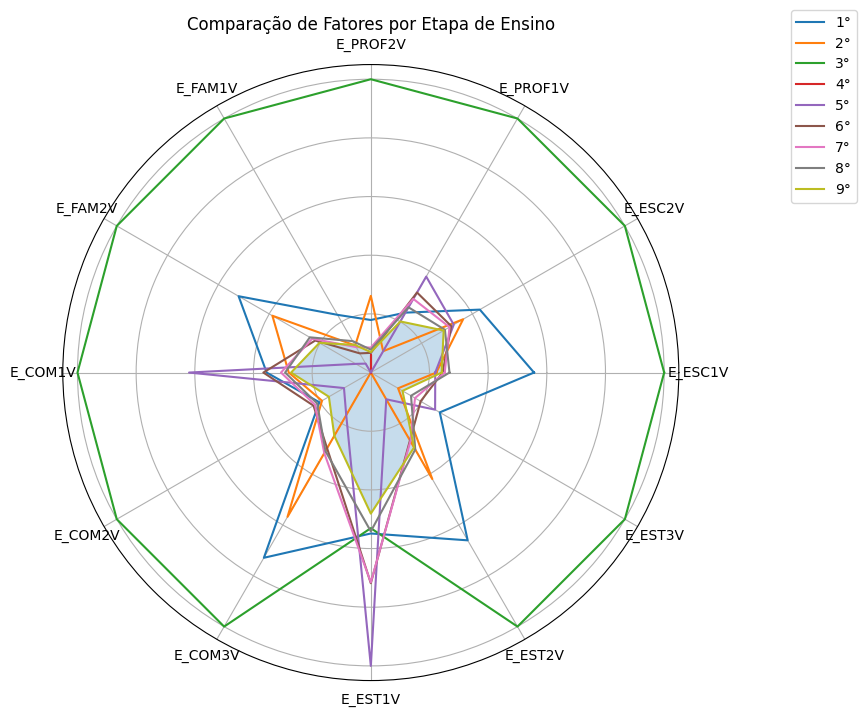

In [198]:
df_dimensoes_etapa = df_file[['ano_turma'] + fatores_v]

# Renomear as labels removendo o prefixo
df_dimensoes_etapa['ano_turma'] = df_dimensoes_etapa['ano_turma']

# Agrupar por ano_turma e encontrar a média de cada dimensão
df_grouped = df_dimensoes_etapa.groupby('ano_turma').mean()

# Normalizar os dados (opcional, dependendo dos valores nas dimensões)
df_normalized = (df_grouped - df_grouped.min()) / (df_grouped.max() - df_grouped.min())

# Criar um gráfico de radar
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, polar=True)

# Loop sobre cada etapa_ensino
for etapa in df_normalized.index:
    values = df_normalized.loc[etapa].tolist()
    values += values[:1]  # Adiciona o primeiro valor no final para fechar o círculo
    angles = [n / float(len(fatores_v)) * 2 * 3.1415926535 for n in range(len(fatores_v))]
    angles += angles[:1]

    plt.plot(angles, values, label=etapa)

    # Adiciona os valores como texto nas pontas do radar
    # for i in range(len(fatores_v)):
    #     plt.text(angles[i], values[i], f'{values[i]:.2f}', ha='center', va='center')

# Adiciona as labels dos fatores
ax.set_xticks(angles[:-1])
ax.set_xticklabels(fatores_v)

plt.fill(angles, values, alpha=0.25)
plt.title('Comparação de Fatores por Etapa de Ensino')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_yticklabels([])  # Remove as labels do eixo radial
plt.show()

In [129]:
df_file.columns

Index(['id_aluno', 'E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV',
       'id_raca_etnia', 'id_renda_familiar', 'sexo', 'id_turma', 'id_escola',
       'etnia', 'renda', 'nome_turma', 'modo_ensino', 'etapa_ensino',
       'ano_turma', 'restricao_de_atendimento', 'localidade_diferenciada',
       'categoria_administrativa', 'dependencia_administrativa',
       'categoria_escola', 'conveniada_poder_publico',
       'regulamentacao_pelo_conselho', 'porte_da_escola', 'modalidade_ensino',
       'outras_ofertas_educacionais', 'uf', 'municipio', 'localizacao',
       'data_criacao', 'E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V',
       'E_FAM2V', 'E_COM1V', 'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V',
       'E_EST3V'],
      dtype='object')

In [134]:
df_file_copy = df_file.copy()

le = LabelEncoder()

columns_to_encode = ['ano_turma', 'localidade_diferenciada', 'categoria_administrativa', 'dependencia_administrativa',
                     'categoria_escola', 'conveniada_poder_publico', 'regulamentacao_pelo_conselho', 'porte_da_escola',
                     'outras_ofertas_educacionais', 'uf', 'municipio', 'localizacao']

for column in columns_to_encode:
    df_file_copy[column] = le.fit_transform(df_file_copy[column])


encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(df_file_copy[columns_to_encode])
X_test_encoded = encoder.transform(df_file_copy[columns_to_encode])

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [165]:
df_teste = df_file_copy[['E_ESC1V', 'E_ESC2V', 'E_PROF1V', 'E_PROF2V', 'E_FAM1V',
       'E_FAM2V', 'E_COM1V', 'E_COM2V', 'E_COM3V', 'E_EST1V', 'E_EST2V',
       'E_EST3V', 'dependencia_administrativa']]

mod1 = smf.ols(formula = f'dependencia_administrativa ~ E_ESC1V + E_ESC2V + E_PROF1V + E_PROF2V + E_FAM1V + E_FAM2V + E_COM1V + E_COM2V + E_COM3V + E_EST1V + E_EST2V + E_EST3V', data = df_teste)
res = mod1.fit()

print(res.summary())

                                OLS Regression Results                                
Dep. Variable:     dependencia_administrativa   R-squared:                       0.015
Model:                                    OLS   Adj. R-squared:                  0.014
Method:                         Least Squares   F-statistic:                     21.25
Date:                        Wed, 15 Nov 2023   Prob (F-statistic):           2.89e-47
Time:                                01:37:05   Log-Likelihood:                -11759.
No. Observations:                       17109   AIC:                         2.354e+04
Df Residuals:                           17096   BIC:                         2.364e+04
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------